In [1]:
// Empty comment just to initialize
// Javalin rendering plugin from SOS Notebook.

2023-09-07 01:17:18:294 +0100 [Thread-0] INFO  log - Logging initialized @786ms to org.eclipse.jetty.util.log.Slf4jLog
2023-09-07 01:17:18:317 +0100 [Thread-0] INFO  Javalin - Starting Javalin ...
2023-09-07 01:17:18:368 +0100 [Thread-0] INFO  Server - jetty-9.4.9.v20180320; built: 2018-03-20T12:21:10Z; git: 1f8159b1e4a42d3f79997021ea1609f2fbac6de5; jvm 1.8.0_121-b15
2023-09-07 01:17:18:388 +0100 [Thread-0] INFO  session - DefaultSessionIdManager workerName=node0
2023-09-07 01:17:18:388 +0100 [Thread-0] INFO  session - No SessionScavenger set, using defaults
2023-09-07 01:17:18:390 +0100 [Thread-0] INFO  session - Scavenging every 600000ms
2023-09-07 01:17:18:394 +0100 [Thread-0] INFO  ContextHandler - Started i.j.e.j.start$httpHandler$1@38b2f6ad{/,null,AVAILABLE}
2023-09-07 01:17:18:412 +0100 [Thread-0] INFO  ContextHandler - Started o.e.j.s.ServletContextHandler@4171ea2f{/,null,AVAILABLE}
2023-09-07 01:17:18:417 +0100 [Thread-0] INFO  AbstractConnector - Started ServerConnector@3f4ce

null

In [2]:
// Import of the JAR file for the basic resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-jdk18on-173.jar

In [3]:
// Import of the JAR file for the extension resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-ext-jdk18on-173.jar

In [4]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.DilithiumParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium Digital Signature Scheme.
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPublicKeyParameters;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of the class of the cryptographic engine's parameters for
// the Public-Key (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
// (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class DilithiumEngineParams {
    
    // Definition of all the required constant values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_n = 256;
    
    // Definition of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q = 8380417;
    
    // Definition of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q_inv = 58728449;
    
    // Definition of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int compression_asymmetric_keys_factor_d = 13;
    
    // Definition of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_pseudo_random_seed_rho_bytes = 32;
    
    // Definition of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_collision_resistant_hashing_bytes = 64;
    
    // Definition of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_pseudo_random_key_k_bytes = 32;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_result_solution_tr_bytes = 64;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_0_bytes = 416;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_1_bytes = 320;


    
    // Definition of all the required variable values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    
    // Definition of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int security_parameters_mode;
    
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_hint_h_polynomial_vector_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_potential_signature_z_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_w_1_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_secret_key_range_eta_bytes;
    
    
    // Definition of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_k;
    
    // Definition of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_l;
    
    // Definition of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_eta;
    
    // Definition of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_tau;
    
    // Definition of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_beta;

    // Definition of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_1;

    // Definition of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_2;

    // Definition of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private final int param_omega;
    

    // Definition of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_public_key_bytes;

    // Definition of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    
    // Constructors of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    
    // Constructor of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param security_parameters_mode: The security parameters mode
    //                                     used for the CRYSTALS-Dilithium
    //                                     Public-Key Digital Signature Scheme.
    public DilithiumEngineParams( int security_parameters_mode ) {
    
        // Setting of the security parameters mode
        // used for the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        this.security_parameters_mode = security_parameters_mode;
        
        // Setting a switch-case code block for all the possible values
        // for the security parameters mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        switch( this.security_parameters_mode ) {
            
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 2.
            case 2:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 4;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 4;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 39;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁷ or 1 << 17).
                this.param_gamma_1 = ( 1 << 17 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 88 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 88 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 80;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 576;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 192;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 3.
            case 3:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 6;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 5;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 4;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 49;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 55;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 128;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 5.
            case 5:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 8;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 7;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 60;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 75;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;
                        
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, has an invalid value.
            default:
                
                // Throwing of an IllegalArgumentException, regarding
                // an invalid value for the security parameters mode used
                // for the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                throw new IllegalArgumentException("Error: Mode #" + this.security_parameters_mode + " " +
                                                   "is not supported for CRYSTALS-Dilithium (Asymmetric) " +
                                                   "Public-Key Digital Signature Scheme!");
        
        }
            
        // Setting of the number of bytes
        // to be used for the computation of
        // the packed hint for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.num_packed_hint_h_polynomial_vector_bytes = 
                ( this.param_omega + this.param_k );

        // Setting of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_public_key_bytes = 
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_k * this.num_target_solution_t_1_bytes ) );

        // Setting of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_secret_key_bytes =
                ( ( 3 * this.num_pseudo_random_seed_rho_bytes ) +
                  ( this.param_l * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_target_solution_t_0_bytes ) );

        // Setting of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_cryptographic_signature_package_sigma_bytes =
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_l * this.num_packed_polynomial_potential_signature_z_bytes ) +
                    this.num_packed_hint_h_polynomial_vector_bytes );
        
    }
    
    
    // Methods of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.

    // Method to obtain the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_n() {
    
        // Return of the maximum degree n of
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_n;
        
    }

    // Method to obtain the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q() {
    
        // Return of the numeric modulus q for
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q;
    
    }

    // Method to obtain the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q_inv() {
    
        // Return of the numeric inverse of modulus q
        // for the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q_inv;
    
    }

    // Method to obtain the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_compression_asymmetric_keys_factor_d() {
    
        // Return of the compression factor d to
        // reduce/compress the size (dropped bits) of
        // the asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.compression_asymmetric_keys_factor_d;
    
    }

    // Method to obtain the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bytes() {
    
        // Return of the number of bytes
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_pseudo_random_seed_rho_bytes;
    
    }

    // Method to obtain the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bits() {
    
        // Return of the number of bits
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_pseudo_random_seed_rho_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

    // Method to obtain the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_collision_resistant_hashing_bytes;
    
    }

    // Method to obtain the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bits() {
    
        // Return of the number of
        // bits to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_collision_resistant_hashing_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_pseudo_random_key_k_bytes;
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bits() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_pseudo_random_key_k_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the final polynomial target result tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_result_solution_tr_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bits() {
    
        // Return of the number of bits
        // to be used for the computation of the final
        // polynomial target result solution tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_result_solution_tr_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_0_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_0_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_1_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_1_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_security_parameters_mode() {
    
        // Return of the security parameters
        // mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.security_parameters_mode;
        
    }

    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bytes() {
        
        // Return of the number of bytes
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_hint_h_polynomial_vector_bytes;

    }

    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bits() {
        
        // Return of the number of bits
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_hint_h_polynomial_vector_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_potential_signature_z_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_potential_signature_z_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_w_1_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_w_1_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bytes() {
        
        // Return of the number of bytes to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_secret_key_range_eta_bytes;
    
    }

    // Method to obtain the number of bits to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bits() {
        
        // Return of the number of bits to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_secret_key_range_eta_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the 1st coordinate k
    // for the input number k of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_k() {
    
        // Return of the 1st coordinate k for
        // the input number k of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_k;
    
    }
    
    // Method to obtain the 2nd coordinate l
    // for the output number l of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_l() {
    
        // Return of the 2nd coordinate l for
        // the output number l of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_l;
    
    }
    
    // Method to obtain the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_eta() {
    
        // Return of the secret key range η of
        // the pseudo-random samples to be used as
        // the secret vectors/arrays s₁ and s₂ to
        // compute the initial polynomial target
        // vector/array t for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_eta;
        
    }

    // Method to obtain the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_tau() {
    
        // Return of the number τ of ± 1's
        // (bits set as 1) in the presented
        // sampled and transmitted challenge c
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_tau;
        
    }
    
    // Method to obtain the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_beta() {
    
        // Return of the maximum possible
        // polynomial coefficient β of the mathematical
        // product c⋅sᵢ vector/array, denoted as well
        // by the mathematical product denoted as τ⋅η from
        // the parameters used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_beta;
        
    }
    
    // Method to obtain the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_1() {
    
        // Return of the coefficient range γ₁ of
        // the expanded masking vector/array y computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_1;
        
    }
    
    // Method to obtain the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_2() {
    
        // Return of the low-order rounding
        // range γ₂ of the high-order packed polynomial
        // coefficients w₁ vector/array computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_2;
        
    }
    
    // Method to obtain the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_param_omega() {
    
        // Return of the maximum number ω of 1's in the hint h
        // given for the resolution of the challenge c vector/array of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.param_omega;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_public_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bits() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_public_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_secret_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bits() {
    
        // Return of the size, in terms of bits,
        // of the asymmetric private key Kₛ to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security
        // under CMA (Chosen Message Attack) property.
        return ( this.get_num_euf_cma_secret_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bytes() {
    
        // Return of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bits() {
    
        // Return of the size, in terms of bits,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_cryptographic_signature_package_sigma_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

}


// Definition of class of Public-Key Digital Signature Scheme
// CRYSTALS-Dilithium (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsDilithiumDigitalSignatureScheme {

    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public final String[]
        security_parameters_modes_names = {
    
        // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        "Dilithium2",
        
        // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        "Dilithium3",
        
        // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        "Dilithium5"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final String[] 
        security_parameters_modes_names_and_descriptions = {
    
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        //    NOTE: The Dilithium2 has a NIST (Classical) Post-Quantum
        //          Security Level of 2 (≈ collision search on SHA-256).
        "=> Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 85 bits.\n\n   " +
        "               NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 2 (≈ collision search on SHA-256).",
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        //    NOTE: The Dilithium3 has a NIST (Classical) Post-Quantum
        //          Security Level of 3 (≈ exhaustive search on AES-192).
        "=> Dilithium3: Security Parameters Set with a factor of (k,l) = (6,5)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 96 bits.\n\n   " +
        "               NOTE: The Dilithium3 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        //    NOTE: The Dilithium5 has a NIST (Classical) Post-Quantum
        //          Security Level of 5 (≈ exhaustive search on AES-256).
        "=> Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 128 bits.\n\n   " +
        "               NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final DilithiumParameterSpec[] 
        security_parameters_modes_specifications = {
        
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        DilithiumParameterSpec.dilithium2,
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        DilithiumParameterSpec.dilithium3,
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        DilithiumParameterSpec.dilithium5
        
    };
    
    // Setting of the array of the parameters modes
    // regarding the input number k of polynomials and
    // the output number l of polynomials per vector used in
    // the matrix A representing the lattice algebraic structure,
    // representing as well, the size factor (k,l) for that
    // same lattice algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security strength of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public final int[] engine_mode_parameters = {
        
        // 1) Parameter Mode 2 to build the 'Dilithium2' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        2,
        
        // 2) Parameters Mode 3 to build the 'Dilithium3' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        3,
        
        // 3) Parameters Mode 5 to build the 'Dilithium5' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        5
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the parameter mode choice index
    // for the generation of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private short parameter_mode_choice_index;
    
    // Definition of the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumParameters parameters;
    
    // Definition of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumEngineParams engine_parameters;
    
    // Definition of the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the generation of the instance of the Key Pair to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    
    // Constructor of the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param parameter_mode_choice_index: The parameter choice index for
    //                                        the generation of the pair of
    //                                        asymmetric keys to be used.
    public CrystalsDilithiumDigitalSignatureScheme( short parameter_mode_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_mode_choice_index = parameter_mode_choice_index;
        
        // Initialization of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.parameters = null;
        
        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a null object.
        this.engine_parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature, as a null object.
        this.asymmetric_key_pair = null;
        
    }
    
    
    // Methods of the class of the Public-Key
    // (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
    // (CRYptographic SuiTe for Algebraic LatticeS - Dilithium).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter mode choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_mode_choice_index() {
        
        // Return of the parameter mode choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_mode_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
        // Security Parameters Modes defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes defined for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_mode_name_and_description() {
        
        // Return of the string with the name and
        // description of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Modes defined for
        // the key pair generation (consisting on private and public keys),
        // as well as the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names_and_descriptions[ this.parameter_mode_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes Specifications.
    public DilithiumParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Specifications.
        return security_parameters_modes_specifications[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the parameter value regarding
    // the number of polynomials k per vector used in
    // the matrix A representing the lattice algebraic
    // structure, representing as well, the size factor
    // for that same lattice algebraic structure, and thus,
    // being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_engine_mode_parameter() {
        
        // Return of the parameter value regarding
        // the number of polynomials k per vector used in
        // the matrix A representing the lattice algebraic
        // structure, representing as well, the size factor
        // for that same lattice algebraic structure, and thus,
        // being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return engine_mode_parameters[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium2' Security Parameter Mode Set.
        if( this.parameter_mode_choice_index == 0 ) {
            
            // Setting the 'Dilithium2' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium2;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium3' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 1 ) {
            
            // Setting the 'Dilithium3' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium3;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium5' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 2 ) {
            
            // Setting the 'Dilithium5' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium5;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public DilithiumParameters get_parameters() {
        
        // Return of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.parameters;
        
    }
    
    
    // Method to initialize the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_engine_parameters() {
        
        // Retrieval of the parameters required
        // to build the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's cryptographic engine.
        int dilithium_engine_mode_parameter = this.get_engine_mode_parameter();

        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.engine_parameters = 
            new DilithiumEngineParams( dilithium_engine_mode_parameter );
        
    }
        
    
    // Method to obtain the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumEngineParams get_engine_parameters() {
        
        // Return of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.engine_parameters;
        
    }
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.key_generation_parameters = 
                new DilithiumKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public DilithiumKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used
    // by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        DilithiumKeyPairGenerator crystals_dilithium_key_pair_generator = 
            new DilithiumKeyPairGenerator();

        // Initialization of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, using
        // the Security Parameters set defined before.
        crystals_dilithium_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        this.asymmetric_key_pair = 
            crystals_dilithium_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_public_key_parameters().getRho();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_public_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the packed polynomial
    // target solution t₁ vector/array encoded (and compressed)
    // in bytes (rounded from the initial target solution
    // vector/array for the mathematical equation A x s + e = t₁),
    // representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
        
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_public_key_parameters().getT1();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
    
        }
    
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_public_key_parameters().length;
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_from_public_key_parameters().length *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( DilithiumPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build public key payload.

            // Retrieval of the the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();
                
            // Retrieval of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution t₁
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_public_key_parameters();
            

            // Return of the payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     pseudo_random_seed_rho,
                                                     target_solution_t_1 );
        
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of public key of the digital signature scheme,
    // using the associated encoding in an array of bytes.
    public DilithiumPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme.
    public DilithiumPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // public key of the digital signature scheme.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getRho();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_key_k_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getK();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_pseudo_random_key_k_from_private_key_parameters().length;
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return ( this.get_pseudo_random_key_k_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_target_result_solution_tr_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getTr();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bytes_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_result_solution_tr_from_private_key_parameters().length;
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bits_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_result_solution_tr_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_1_from_private_key_parameters().length;

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bits_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_2_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS2();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_2_from_private_key_parameters().length;

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bits_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_2_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_0_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT0();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_0_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_0_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( DilithiumPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bits() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPrivateKeyParameters get_private_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build private key payload.

            // Retrieval of the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_private_key_parameters();
            
            // Retrieval of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_key_k = 
                this.get_pseudo_random_key_k_from_private_key_parameters();
            
            // Retrieval of the final polynomial target
            // result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] target_result_solution_tr = 
                this.get_target_result_solution_tr_from_private_key_parameters();
            
            // Retrieval of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_1 = 
                this.get_random_secret_s_1_from_private_key_parameters();
    
            // Retrieval of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_2 = 
                this.get_random_secret_s_2_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_0 = 
                this.get_target_solution_t_0_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_private_key_parameters();
            
            
            // Return of the payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme.
            return new DilithiumPrivateKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                      pseudo_random_seed_rho,
                                                      pseudo_random_key_k,
                                                      target_result_solution_tr,
                                                      random_secret_s_1,
                                                      random_secret_s_2,
                                                      target_solution_t_0,
                                                      target_solution_t_1 );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme.
    public DilithiumPrivateKeyParameters get_private_key_payload() {
    
        // Return of the payload of the private key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // private key of the digital signature scheme.
        return this.get_private_key_payload_from_parameters();
        
    }

}


// Setting of the number of parameter set mode choices for
// the generation of the asymmetric key pair to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
final short NUM_PARAMETERS_SET_MODE_CHOICES = 3;

// Setting of the number of trials for the generation of
// the asymmetric key pairs to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
// in order to estimate the average time spent in it.
final short NUM_TRIALS_ASYMMETRIC_KEY_GENERATION = 10;

// Setting of the number of size metrics to be
// analysed from the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme.
final short NUM_SIZE_METRICS = 3;


// Setting of matrix of the time estimated metrics for each trial,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
double[][] crystals_dilithium_digital_signature_schemes_key_generation_times = 
    new double[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_TRIALS_ASYMMETRIC_KEY_GENERATION];

// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    
// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, not considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the standard deviation of
// the time estimated metrics for all trials, regarding
// the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_std_times =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    

// Setting of the array of the upper bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the lower bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];


// Setting of the size metrics (keys and ciphertexts) to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
int[][][] crystals_dilithium_digital_signature_schemes_sizes_metrics = 
    new int[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_SIZE_METRICS][2];


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Creation of a CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // using a set of security parameters' modes pre-defined.
    CrystalsDilithiumDigitalSignatureScheme crystals_dilithium_digital_signature_scheme = 
        new CrystalsDilithiumDigitalSignatureScheme( param_set_mode_choice_idx );


    // Retrieval of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters' Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    String crystals_dilithium_security_parameters_mode_name_and_description = 
        crystals_dilithium_digital_signature_scheme.get_security_parameters_mode_name_and_description();


    // Retrieval of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Specifications.
    DilithiumParameterSpec crystals_dilithium_security_parameters_specification =
        crystals_dilithium_digital_signature_scheme.get_security_parameters_specifications();



    // Print of the relevant information for the use of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of
    // a possible execution of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println(" ------------ EXAMPLE OF AN EXECUTION OF THE EUF-CMA CRYSTALS-DILITHIUM " + 
                                     "PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    System.out.println( "  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_dilithium_security_parameters_mode_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_parameters();
    
    
    // Initialization of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_engine_parameters();

    // Retrieval of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    DilithiumEngineParams crystals_dilithium_digital_signature_scheme_engine_parameters = 
        crystals_dilithium_digital_signature_scheme.get_engine_parameters();

    
    // Retrieval of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int security_parameters_mode = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_security_parameters_mode();
    
    // Retrieval of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_k = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_k();
    
    // Retrieval of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_l = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_l();
    
    // Retrieval of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_n = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_n();
    
    // Retrieval of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q();
    
    // Retrieval of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q_inv = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q_inv();
    
    // Retrieval of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int compression_asymmetric_keys_factor_d = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_compression_asymmetric_keys_factor_d();
    
    // Retrieval of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_eta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_eta();
    
    // Retrieval of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_tau = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_tau();
    
    // Retrieval of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_beta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_beta();
    

    // Retrieval of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_1 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_1();

    // Retrieval of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_2 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_2();

    // Retrieval of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int param_omega = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_omega();
    
    
    
    // Print of the string with the size of
    // the Security Parameter Set to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Security Parameter Set " + 
                        "(Mode = " + security_parameters_mode + ") to be adopted:\n" +
                        "       - " + "k = " + param_k + " | " + "l = " + param_l + " | "
                                    + "n = " + param_n + " | " + "d = " + compression_asymmetric_keys_factor_d + " | "
                                    + "q = " + param_q + " | " + "q⁻¹ = " + param_q_inv + "\n" +
                        "         " + "η = " + param_eta + " | " + "τ = " + param_tau + " | "
                                    + "β = " + param_beta + " | " + "ω = " + param_omega + " | "
                                    + "γ₁ = " + param_gamma_1 + " | " + "γ₂ = " + param_gamma_2 );


    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bytes();
    
    // Retrieval of the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bits();
    
    
    // Print of the string with the size of the (Pseudo) Random Seeds,
    // Collision-Resistant Hashes, and (Pseudo) Random Secrets/Keys,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and\n" +
                        "       (Pseudo) Random Secrets/Keys to be generated and used:\n" +
                        "       " + "- Size of a (Pseudo) Random Seed ρ: " 
                                  + num_pseudo_random_seed_rho_bytes  + " bytes | " + num_pseudo_random_seed_rho_bits + " bits\n" +
                        "       " + "- Size of a Collision-Resistant Hash ρ': " 
                                  + num_collision_resistant_hashing_bytes + " bytes | " + num_collision_resistant_hashing_bits + " bits\n" +
                        "       " + "- Size of a (Pseudo) Random Secret/Key K: " 
                                  + num_pseudo_random_key_k_bytes  + " bytes | " + num_pseudo_random_key_k_bits + " bits");

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bits();
    
    
    // Print of the string with the size of the target solutions vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the Target Solutions Vectors/Arrays to be generated and used:\n" +
                        "       " + "- Size of a Target Solution t₀: " 
                                  + num_target_solution_t_0_bytes + " bytes | " + num_target_solution_t_0_bits + " bits\n" +
                        "       " + "- Size of a Target Solution t₁: " 
                                  + num_target_solution_t_1_bytes + " bytes | " + num_target_solution_t_1_bits + " bits\n" +
                        "       " + "- Size of a Target Result Solution tr: " 
                                  + num_target_result_solution_tr_bytes + " bytes | " + num_target_result_solution_tr_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the generation of
    // the pair of asymmetric keys.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Key Generation:\n" +
                        "       " + "- Size of a Secret Key Range Packed Polynomial η: " 
                                  + num_packed_polynomial_secret_key_range_eta_bytes + " bytes | " + num_packed_polynomial_secret_key_range_eta_bits + " bits\n" +
                        "       " + "- Size of a High-Order Packed Polynomial Coefficients w₁: " 
                                  + num_packed_polynomial_w_1_bytes + " bytes | " + num_packed_polynomial_w_1_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bytes();

    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Signing Mechanism:\n" +
                        "       " + "- Size of a Hint Packed Polynomial h: " 
                                  + num_packed_hint_h_polynomial_vector_bytes + " bytes | " + num_packed_hint_h_polynomial_vector_bits + " bits\n" +
                        "       " + "- Size of a Potential Signature Packed Polynomial z: " 
                                  + num_packed_polynomial_potential_signature_z_bytes + " bytes | " + num_packed_polynomial_potential_signature_z_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bytes();
    
    // Retrieval of the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bits();

    // Retrieval of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bytes();

    // Retrieval of the size, in terms of bits, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bits();
    
    // Retrieval of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bytes();
    
    // Retrieval of the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bits();
    
    
    // Print of the string with the size of EUF-CMA,
    // (Existential UnForgeability under Chosen Message Attack)
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure,
    // as well as the resulting cryptographic signature produced.
    System.out.println( "     * Size of EUF-CMA (Existential UnForgeability under Chosen Message Attack)\n" +
                        "       Pair of Asymmetric Keys and Cryptographic Signature, to be used by\n" +
                        "       the internal Signing and Verifying procedures:\n" +
                        "       " + "- Size of an EUF-CMA Public Key Kₚ: " 
                                  + num_euf_cma_public_key_bytes + " bytes | " + num_euf_cma_public_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA (Secret) Private Key Kₛ: " 
                                  + num_euf_cma_secret_key_bytes + " bytes | " + num_euf_cma_secret_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA Cryptographic Signature Package σ: " 
                                  + num_euf_cma_cryptographic_signature_package_sigma_bytes + " bytes | " + num_euf_cma_cryptographic_signature_package_sigma_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set choice mode (Mode = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {

        // Computation of the start time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long start_time_trial_asymmetric_key_generation = 
            System.nanoTime();

        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

        // Initialization of the generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();

        // Computation of the end time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long end_time_trial_asymmetric_key_generation = 
            System.nanoTime();
        
        // Computation and store of the elapsed time estimated,
        // regarding the generation of the asymmetric key pairs to be
        // analysed from the current configured CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, measured in nanoseconds.
        crystals_dilithium_digital_signature_schemes_key_generation_times
            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] +=
                ( (double) end_time_trial_asymmetric_key_generation - 
                  (double) start_time_trial_asymmetric_key_generation );
        
    }
    

    // Initialization of the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

    // Initialization of the generation of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );
    
    
    // Print of a header for the parameters and
    // information about the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PUBLIC KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_public_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_public_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_public_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_public_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_public_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_public_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_public_key_parameters_byte :
            target_solution_t_1_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_public_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_public_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_public_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the public key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_public_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_public_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_public_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_public_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_public_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_public_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Print of one bold line, as a separator.
    System.out.println( "     ================================================" +
                             "================================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric private key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_private_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] pseudo_random_key_k_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_from_private_key_parameters();


    // Initialization of a String Buffer for the string
    // representation in hexadecimal of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_key_k_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_key_k_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo)
            // random cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random
    // cryptographic key K, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, from the upper-case values of
    // the respective String Buffer.
    String[] pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_key_k_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int k_i = 0; k_i < pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars.length; k_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_i != 0 ) && ( k_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the (pseudo) random cryptographic key K, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
            " K" + "[" + k_i + "]" + " = " + 
                    pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars[k_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_key_k_from_private_key_parameters_binary_string = "K = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_key_k_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_key_k_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ K (uniformly (pseudo) random cryptographic key) " + 
                               "[" + pseudo_random_key_k_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_key_k_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bits_from_private_key_parameters();


    // Retrieval of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_result_solution_tr_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the final polynomial target
    // result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_result_solution_tr_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( target_result_solution_tr_from_private_key_parameters_curr_byte_idx < 
            ( target_result_solution_tr_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the final polynomial
            // target result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_result_solution_tr_from_private_key_parameters_hexadecimal_string = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the final polynomial target result
    // solution tr vector/array, retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_result_solution_tr_from_private_key_parameters_hexadecimal_chars = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string
            .split( ";", target_result_solution_tr_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int tr_i = 0; tr_i < target_result_solution_tr_from_private_key_parameters_hexadecimal_chars.length; tr_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( tr_i != 0 ) && ( tr_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the final polynomial target result solution tr vector/array,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the final polynomial
        // target result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
            " tr" + "[" + tr_i + "]" + " = " + 
                    target_result_solution_tr_from_private_key_parameters_hexadecimal_chars[tr_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_result_solution_tr_from_private_key_parameters_binary_string = "tr = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        target_result_solution_tr_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( target_result_solution_tr_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( target_result_solution_tr_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the final polynomial
            // target result solution tr vector/array, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_binary_string += 
                "\n                           ";

        }

        // Incrementation of the index for the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the final
    // polynomial target result solution tr vector/array, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ tr ((Hashed) Target Result Solution Vector) " + 
                               "[" + target_result_solution_tr_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     target_result_solution_tr_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_result_solution_tr_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + target_result_solution_tr_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bits_from_private_key_parameters();


    // Retrieval of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_1_from_private_key_parameters_byte :
            random_secret_s_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_1_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random secret s₁
                // (i.e. the 1st secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_1_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_1_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_hexadecimal_chars.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_hexadecimal_chars[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_1_from_private_key_parameters_values =
        new short[ ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_values.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_values_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_values[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₁ (Random Secret Vector #1)\n" + 
                        "        " + "     [" + random_secret_s_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bits_from_private_key_parameters();


    // Retrieval of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_2_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_2_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_2_from_private_key_parameters_byte :
            random_secret_s_2_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_2_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_2_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random (error)
            // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_2_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_2_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random (error)
                // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_2_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_2_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_2_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_hexadecimal_chars.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random (error)
        // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_hexadecimal_chars[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random (error) secret s₂ (i.e. the 2nd secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_2_from_private_key_parameters_values =
        new short[ ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_2_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_2_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_2_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_values.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_values_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_values[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₂ (Random (Error) Secret Vector #2)\n" + 
                        "        " + "     [" + random_secret_s_2_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_2_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_0_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_0_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_0_from_private_key_parameters_byte :
            target_solution_t_0_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_0_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_0_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_0_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_0_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_0_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_0_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_0_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_hexadecimal_chars.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₀
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_hexadecimal_chars[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_0_from_private_key_parameters_values =
        new short[ ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_0_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_0_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_0_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_values.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_values_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_values[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₀ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_0_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_0_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_private_key_parameters_byte :
            target_solution_t_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_private_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_values_string );
    
    
    // Saving of the size metrics of the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] = num_euf_cma_public_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] = num_euf_cma_public_key_bits;

    // Saving of the size metrics of the asymmetric private (secret) key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] = num_euf_cma_secret_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] = num_euf_cma_secret_key_bits;
    
    // Saving of the size metrics of the cryptographic
    // digital signature package vector/array σ (sigma) to be 
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] = num_euf_cma_cryptographic_signature_package_sigma_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] = num_euf_cma_cryptographic_signature_package_sigma_bits;

}











// Setting of the string array with the names of
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
// Security Parameters Mode for the key pair generation
// (consisting on private and public keys), as well as
// the respective Digital Signature procedure.
String[] security_parameters_names = {

    // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 85 bits.
    "Dilithium2",

    // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 96 bits.
    "Dilithium3",

    // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 128 bits.
    "Dilithium5"

};


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {
    
    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Schemes, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative average time of
        // the elapsed time estimated for all trials, regarding the generation of
        // the asymmetric key pairs to be analysed from the current configured
        // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // considering possible outlier values.
        crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] += 
                crystals_dilithium_digital_signature_schemes_key_generation_times
                        [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
    
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] /= 
        (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION;
    
    
    // Initialization of the array of the standard deviation of
    // the time estimated metrics for all trials, regarding the generation of
    // the asymmetric key pairs to be analysed from the current configured
    // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative variance of
        // the elapsed time estimated for all trials, regarding
        // the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] += 
                Math.pow( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] -
                            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
                            [param_set_mode_choice_idx] ), 2 );
    
    }

    
    // Computation and setting of the standard deviation of
    // the elapsed time estimated for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] = 
        Math.sqrt( ( crystals_dilithium_digital_signature_schemes_key_generation_std_times
                     [param_set_mode_choice_idx] / (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION ) );
    
    
    // Computation and setting of the upper bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] +
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );
    
    // Computation and setting of the lower bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] -
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );


    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] = (double) 0.0;
    
    // Initialization of the counter for the non-outlier
    // average time estimated metrics for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
    int num_avg_times_non_outliers = 0;

    // For each trial for the generation of the asymmetric key pairs to be used
    // internally by the CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
    // according to the associated parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
        
        // If the current average time estimated metrics for all trials,
        // regarding the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
        // is not considered an outlier value and will be included to
        // compute the final average time estimated metrics.
        if( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] <=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] ) &&
            ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] >=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] ) ) {
                  
            // Computation and update of the cumulative average time of
            // the elapsed time estimated for all trials, regarding the generation of
            // the asymmetric key pairs to be analysed from the current configured
            // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // without considering possible outlier values.
            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] +=
                    crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
            
            // Incrementation of the counter for the non-outlier
            // average time estimated metrics for all trials, regarding
            // the generation of the asymmetric key pairs to be analysed from
            // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
            num_avg_times_non_outliers += 1;
                  
        }
        
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) num_avg_times_non_outliers;
            
    // Conversion and update of the elapsed average time estimated,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from nanoseconds (ns) to microseconds (μs).
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) 1000;

}


// Print of the relevant information for the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.

// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of the header of the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
System.out.println( " ------------------------------ " +
                    "SIZE AND PERFORMANCE METRICS" +
                    " ------------------------------ ");


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Print of the size metrics for keys and digital signatures produced for
    // each configuration of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // according to the associated parameters set mode choice (M = 2,3,5).
    System.out.println
        ( "    " + security_parameters_names[param_set_mode_choice_idx] + ": " + 
               "[ " + "#Kₚ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] + " bits"
                    + ";\n                  " +
                      "#Kₛ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] + " bits"
                    + ";\n                  " +
                      "#σ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] + " bits"
           + " ]\n" + "                "
           + "[ " + "Avg. Time for Key Gen.: "
                  + String.format( "%.3f", crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] )
                  + " microseconds (μs)"
           + " ]\n" );

}


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of a bold line, as a final separator.
System.out.println( " ----------------------------------------" +
                    "-------------------------------------------------- ");






 ------------ EXAMPLE OF AN EXECUTION OF THE EUF-CMA CRYSTALS-DILITHIUM PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ 


  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:

   => Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)
                  for the size of the lattice algebraic structure, which provides
                  a (post-quantum) security strength of 85 bits.

                  NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)
                        Post-Quantum Security Level of 2 (≈ collision search on SHA-256).

     * Security Parameter Set (Mode = 2) to be adopted:
       - k = 4 | l = 4 | n = 256 | d = 13 | q = 8380417 | q⁻¹ = 58728449
         η = 2 | τ = 39 | β = 78 | ω = 80 | γ₁ = 131072 | γ₂ = 95232

     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and
       (Pseudo) Random Secrets/Keys to be generated and used:
       - Size of a (Pseudo) Random Seed ρ: 32 bytes | 

           t₁[180] = 47 06;  t₁[181] = DF 1A;  t₁[182] = E8 E4;  t₁[183] = 17 8B; 
           t₁[184] = E6 5E;  t₁[185] = D3 A6;  t₁[186] = 2B 10;  t₁[187] = 18 80; 
           t₁[188] = 87 83;  t₁[189] = C0 61;  t₁[190] = 34 77;  t₁[191] = 0A 8E; 
           t₁[192] = CC 2D;  t₁[193] = 2D 84;  t₁[194] = BA 02;  t₁[195] = 26 FF; 
           t₁[196] = 4E 86;  t₁[197] = 86 7F;  t₁[198] = B2 6F;  t₁[199] = DE A8; 
           t₁[200] = 9E 80;  t₁[201] = 71 CD;  t₁[202] = 5D 2A;  t₁[203] = 18 CD; 
           t₁[204] = 23 AA;  t₁[205] = 7E E4;  t₁[206] = 2F 5C;  t₁[207] = A4 AF; 
           t₁[208] = E2 AD;  t₁[209] = 33 3A;  t₁[210] = 90 BD;  t₁[211] = 72 ED; 
           t₁[212] = 8E C2;  t₁[213] = 76 CE;  t₁[214] = FF 6B;  t₁[215] = 9B 1A; 
           t₁[216] = CF B9;  t₁[217] = 80 1A;  t₁[218] = 08 24;  t₁[219] = AA 48; 
           t₁[220] = BD 2B;  t₁[221] = 7A 38;  t₁[222] = 79 7E;  t₁[223] = EC 2F; 
           t₁[224] = D3 3C;  t₁[225] = DF 4C;  t₁[226] = 2B 22;  t₁[227] = 35 4B; 
    

           t₁[540] = 16 E5;  t₁[541] = 77 81;  t₁[542] = 3C E5;  t₁[543] = C5 E1; 
           t₁[544] = 38 D1;  t₁[545] = 17 CE;  t₁[546] = B4 8F;  t₁[547] = 04 CC; 
           t₁[548] = 2E 3B;  t₁[549] = 72 88;  t₁[550] = 75 51;  t₁[551] = EA E4; 
           t₁[552] = 61 B0;  t₁[553] = AA B9;  t₁[554] = 41 01;  t₁[555] = D8 C0; 
           t₁[556] = 20 CE;  t₁[557] = 3A A6;  t₁[558] = 03 5B;  t₁[559] = 48 6F; 
           t₁[560] = 9A 00;  t₁[561] = A0 0D;  t₁[562] = 40 13;  t₁[563] = 4B E0; 
           t₁[564] = F8 D2;  t₁[565] = 8F 1B;  t₁[566] = A4 92;  t₁[567] = A0 D9; 
           t₁[568] = 42 2A;  t₁[569] = EA 65;  t₁[570] = 70 28;  t₁[571] = A6 C5; 
           t₁[572] = B7 95;  t₁[573] = 05 E1;  t₁[574] = E1 D4;  t₁[575] = 20 DC; 
           t₁[576] = DE 5A;  t₁[577] = 8D 29;  t₁[578] = 7E C7;  t₁[579] = E0 A6; 
           t₁[580] = D3 E9;  t₁[581] = B7 CD;  t₁[582] = AC AE;  t₁[583] = 31 B8; 
           t₁[584] = 98 40;  t₁[585] = E2 CA;  t₁[586] = 52 D6;  t₁[587] = 91 0F; 
    

           t₁[180] = 1607;  t₁[181] = 6879;  t₁[182] = -6936;  t₁[183] = -29929; 
           t₁[184] = 24294;  t₁[185] = -22829;  t₁[186] = 4139;  t₁[187] = -32744; 
           t₁[188] = -31865;  t₁[189] = 25024;  t₁[190] = 30516;  t₁[191] = -29174; 
           t₁[192] = 11724;  t₁[193] = -31699;  t₁[194] = 698;  t₁[195] = -218; 
           t₁[196] = -31154;  t₁[197] = 32646;  t₁[198] = 28594;  t₁[199] = -22306; 
           t₁[200] = -32610;  t₁[201] = -12943;  t₁[202] = 10845;  t₁[203] = -13032; 
           t₁[204] = -21981;  t₁[205] = -7042;  t₁[206] = 23599;  t₁[207] = -20572; 
           t₁[208] = -21022;  t₁[209] = 14899;  t₁[210] = -17008;  t₁[211] = -4750; 
           t₁[212] = -15730;  t₁[213] = -12682;  t₁[214] = 27647;  t₁[215] = 6811; 
           t₁[216] = -17969;  t₁[217] = 6784;  t₁[218] = 9224;  t₁[219] = 18602; 
           t₁[220] = 11197;  t₁[221] = 14458;  t₁[222] = 32377;  t₁[223] = 12268; 
           t₁[224] = 15571;  t₁[225] = 19679;  t₁[226] = 8747;  t₁[227] = 1925

           t₁[536] = 25690;  t₁[537] = 19775;  t₁[538] = -32425;  t₁[539] = 8202; 
           t₁[540] = -6890;  t₁[541] = -32393;  t₁[542] = -6852;  t₁[543] = -7739; 
           t₁[544] = -11976;  t₁[545] = -12777;  t₁[546] = -28748;  t₁[547] = -13308; 
           t₁[548] = 15150;  t₁[549] = -30606;  t₁[550] = 20853;  t₁[551] = -6934; 
           t₁[552] = -20383;  t₁[553] = -18006;  t₁[554] = 321;  t₁[555] = -16168; 
           t₁[556] = -12768;  t₁[557] = -22982;  t₁[558] = 23299;  t₁[559] = 28488; 
           t₁[560] = 154;  t₁[561] = 3488;  t₁[562] = 4928;  t₁[563] = -8117; 
           t₁[564] = -11528;  t₁[565] = 7055;  t₁[566] = -27996;  t₁[567] = -9824; 
           t₁[568] = 10818;  t₁[569] = 26090;  t₁[570] = 10352;  t₁[571] = -14938; 
           t₁[572] = -27209;  t₁[573] = -7931;  t₁[574] = -11039;  t₁[575] = -9184; 
           t₁[576] = 23262;  t₁[577] = 10637;  t₁[578] = -14466;  t₁[579] = -22816; 
           t₁[580] = -5677;  t₁[581] = -12873;  t₁[582] = -20820;  t₁[583] =

                          00110100100010101000001101100101

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + tr ((Hashed) Target Result Solution Vector) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           tr[0] = 3B;  tr[1] = CE;  tr[2] = 2C;  tr[3] = D8; 
           tr[4] = 2A;  tr[5] = 80;  tr[6] = 44;  tr[7] = 04; 
           tr[8] = 82;  tr[9] = C2;  tr[10] = DB;  tr[11] = B8; 
           tr[12] = 23;  tr[13] = B6;  tr[14] = 9B;  tr[15] = 67; 
           tr[16] = 2D;  tr[17] = D0;  tr[18] = BB;  tr[19] = 87; 
           tr[20] = 71;  tr[21] = 0B;  tr[22] = DF;  tr[23] = F3; 
           tr[24] = 3C;  tr[25] = 02;  tr[26] = 8C;  tr[27] = 9B; 
           tr[28] = 9F;  tr[29] = C1;  tr[30] = 34;  tr[31] = 3B; 


          Binary Values: 
           tr = {0,1}²⁵⁶ = 001110111100111000101100110110000010101010000000
                           010001000000010010000010110000101101101110111000
                           00

           s₁[180] = 00 93;  s₁[181] = 65 24;  s₁[182] = 23 2A;  s₁[183] = 11 A1; 
           s₁[184] = 05 10;  s₁[185] = A2 71;  s₁[186] = 89 10;  s₁[187] = 81 4B; 
           s₁[188] = 14 92;  s₁[189] = 8A 22;  s₁[190] = 68 0C;  s₁[191] = B8 90; 


          (Short) Integer Values: 
           s₁[0] = 18507;  s₁[1] = 25094;  s₁[2] = 4368;  s₁[3] = 5379; 
           s₁[4] = 21517;  s₁[5] = 25776;  s₁[6] = 2073;  s₁[7] = 270; 
           s₁[8] = 18695;  s₁[9] = -27508;  s₁[10] = -32256;  s₁[11] = -29130; 
           s₁[12] = 16484;  s₁[13] = -23792;  s₁[14] = 10514;  s₁[15] = 12418; 
           s₁[16] = 9354;  s₁[17] = 19524;  s₁[18] = -18845;  s₁[19] = -8143; 
           s₁[20] = 20664;  s₁[21] = 4700;  s₁[22] = -13966;  s₁[23] = 19604; 
           s₁[24] = 8204;  s₁[25] = 25481;  s₁[26] = -30206;  s₁[27] = 17435; 
           s₁[28] = -15510;  s₁[29] = 386;  s₁[30] = 13312;  s₁[31] = -8091; 
           s₁[32] = 1408;  s₁[33] = 17034;  s₁[34] = 9097;  s₁[35] = 11537; 
           s₁[36]

           s₁[180] = -27904;  s₁[181] = 9317;  s₁[182] = 10787;  s₁[183] = -24303; 
           s₁[184] = 4101;  s₁[185] = 29090;  s₁[186] = 4233;  s₁[187] = 19329; 
           s₁[188] = -28140;  s₁[189] = 8842;  s₁[190] = 3176;  s₁[191] = -28488; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + s₂ (Random (Error) Secret Vector #2)
             [384 bytes | 192 short integers | 3072 bits]:


          Hexadecimal Values: 
           s₂[0] = 03 10;  s₂[1] = 01 64;  s₂[2] = 32 2A;  s₂[3] = 8C 04; 
           s₂[4] = 42 5B;  s₂[5] = 46 71;  s₂[6] = E2 14;  s₂[7] = 42 5A; 
           s₂[8] = 92 2D;  s₂[9] = 10 42;  s₂[10] = 0E 84;  s₂[11] = C6 4C; 
           s₂[12] = D9 A0;  s₂[13] = 6C 0B;  s₂[14] = 81 61;  s₂[15] = E0 84; 
           s₂[16] = 50 9B;  s₂[17] = C4 65;  s₂[18] = 9A 28;  s₂[19] = 00 1A; 
           s₂[20] = 98 50;  s₂[21] = 5A A4;  s₂[22] = 28 D3;  s₂[23] = 22 00; 
           s₂[24] = 1C 81;  s₂[25] = 0D 10;  s₂[26] =

           s₂[180] = 13 14;  s₂[181] = 24 19;  s₂[182] = 45 62;  s₂[183] = C4 32; 
           s₂[184] = 70 9B;  s₂[185] = 18 66;  s₂[186] = E0 92;  s₂[187] = 6D 99; 
           s₂[188] = 12 0D;  s₂[189] = 42 30;  s₂[190] = 0C 88;  s₂[191] = 18 20; 


          (Short) Integer Values: 
           s₂[0] = 4099;  s₂[1] = 25601;  s₂[2] = 10802;  s₂[3] = 1164; 
           s₂[4] = 23362;  s₂[5] = 28998;  s₂[6] = 5346;  s₂[7] = 23106; 
           s₂[8] = 11666;  s₂[9] = 16912;  s₂[10] = -31730;  s₂[11] = 19654; 
           s₂[12] = -24359;  s₂[13] = 2924;  s₂[14] = 24961;  s₂[15] = -31520; 
           s₂[16] = -25776;  s₂[17] = 26052;  s₂[18] = 10394;  s₂[19] = 6656; 
           s₂[20] = 20632;  s₂[21] = -23462;  s₂[22] = -11480;  s₂[23] = 34; 
           s₂[24] = -32484;  s₂[25] = 4109;  s₂[26] = 9731;  s₂[27] = -32160; 
           s₂[28] = -15988;  s₂[29] = 1448;  s₂[30] = 8291;  s₂[31] = 5162; 
           s₂[32] = 1410;  s₂[33] = 9280;  s₂[34] = -9594;  s₂[35] = 25656; 
           s₂[36] =

           s₂[180] = 5139;  s₂[181] = 6436;  s₂[182] = 25157;  s₂[183] = 12996; 
           s₂[184] = -25744;  s₂[185] = 26136;  s₂[186] = -27936;  s₂[187] = -26259; 
           s₂[188] = 3346;  s₂[189] = 12354;  s₂[190] = -30708;  s₂[191] = 8216; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [1664 bytes | 832 short integers | 13312 bits]:


          Hexadecimal Values: 
           t₀[0] = B3 3B;  t₀[1] = C0 FA;  t₀[2] = C6 B7;  t₀[3] = AC 87; 
           t₀[4] = 97 73;  t₀[5] = 51 F7;  t₀[6] = C2 F3;  t₀[7] = 8D CB; 
           t₀[8] = E5 04;  t₀[9] = BF 81;  t₀[10] = F3 00;  t₀[11] = 19 4D; 
           t₀[12] = 2D 4D;  t₀[13] = A7 CA;  t₀[14] = 54 94;  t₀[15] = 8D 79; 
           t₀[16] = 50 5B;  t₀[17] = 5C 6A;  t₀[18] = F0 91;  t₀[19] = 5A A0; 
           t₀[20] = 33 5A;  t₀[21] = DD D4;  t₀[22] = CC 8D;  t₀[23] = FC AE; 
           t₀[24] = 9A 9B;  t₀[25] 

           t₀[180] = E7 E6;  t₀[181] = 7A 42;  t₀[182] = 1C 09;  t₀[183] = A0 CF; 
           t₀[184] = 5C 15;  t₀[185] = D6 7C;  t₀[186] = F3 B5;  t₀[187] = 14 99; 
           t₀[188] = F1 41;  t₀[189] = 2E 8B;  t₀[190] = F6 7E;  t₀[191] = 24 56; 
           t₀[192] = E3 67;  t₀[193] = EE BB;  t₀[194] = 8D 7E;  t₀[195] = 38 A1; 
           t₀[196] = 6C D1;  t₀[197] = 5E 62;  t₀[198] = 0E 08;  t₀[199] = 10 94; 
           t₀[200] = 0A 76;  t₀[201] = E9 BF;  t₀[202] = FC A0;  t₀[203] = CE AD; 
           t₀[204] = 4A 0F;  t₀[205] = 05 C0;  t₀[206] = A4 3E;  t₀[207] = 0E D2; 
           t₀[208] = A3 31;  t₀[209] = E5 33;  t₀[210] = 19 4F;  t₀[211] = 7C 31; 
           t₀[212] = 57 4A;  t₀[213] = D3 48;  t₀[214] = 97 F7;  t₀[215] = 04 9A; 
           t₀[216] = 62 7F;  t₀[217] = 28 BC;  t₀[218] = 6B 3F;  t₀[219] = A4 95; 
           t₀[220] = CA B1;  t₀[221] = BC 88;  t₀[222] = 44 EA;  t₀[223] = 77 C0; 
           t₀[224] = F5 C4;  t₀[225] = B3 42;  t₀[226] = 79 4B;  t₀[227] = FD AA; 
    

           t₀[540] = 88 85;  t₀[541] = C3 70;  t₀[542] = EC 15;  t₀[543] = D1 2B; 
           t₀[544] = F2 43;  t₀[545] = 07 25;  t₀[546] = C4 17;  t₀[547] = 4B C2; 
           t₀[548] = EA 2D;  t₀[549] = C9 51;  t₀[550] = 05 E6;  t₀[551] = 2D 77; 
           t₀[552] = 12 84;  t₀[553] = 16 9E;  t₀[554] = 49 23;  t₀[555] = 9F 53; 
           t₀[556] = 76 D7;  t₀[557] = 7A C7;  t₀[558] = B4 14;  t₀[559] = EF 4C; 
           t₀[560] = 4E 61;  t₀[561] = 7D 07;  t₀[562] = 48 6A;  t₀[563] = 9F E4; 
           t₀[564] = EC F3;  t₀[565] = 06 5E;  t₀[566] = AE FA;  t₀[567] = F1 C4; 
           t₀[568] = C7 FC;  t₀[569] = 45 18;  t₀[570] = 8A FB;  t₀[571] = D7 52; 
           t₀[572] = 41 D5;  t₀[573] = E3 0E;  t₀[574] = BA 57;  t₀[575] = C7 CB; 
           t₀[576] = 8D 47;  t₀[577] = C0 B1;  t₀[578] = C6 BE;  t₀[579] = 52 C5; 
           t₀[580] = 5C 05;  t₀[581] = B1 36;  t₀[582] = BA 85;  t₀[583] = 4B 2E; 
           t₀[584] = 62 62;  t₀[585] = 9E 3B;  t₀[586] = 14 06;  t₀[587] = 99 61; 
    



          (Short) Integer Values: 
           t₀[0] = 15283;  t₀[1] = -1344;  t₀[2] = -18490;  t₀[3] = -30804; 
           t₀[4] = 29591;  t₀[5] = -2223;  t₀[6] = -3134;  t₀[7] = -13427; 
           t₀[8] = 1253;  t₀[9] = -32321;  t₀[10] = 243;  t₀[11] = 19737; 
           t₀[12] = 19757;  t₀[13] = -13657;  t₀[14] = -27564;  t₀[15] = 31117; 
           t₀[16] = 23376;  t₀[17] = 27228;  t₀[18] = -28176;  t₀[19] = -24486; 
           t₀[20] = 23091;  t₀[21] = -11043;  t₀[22] = -29236;  t₀[23] = -20740; 
           t₀[24] = -25702;  t₀[25] = -27956;  t₀[26] = -20326;  t₀[27] = 14027; 
           t₀[28] = 3616;  t₀[29] = -22295;  t₀[30] = 21866;  t₀[31] = -6215; 
           t₀[32] = 23790;  t₀[33] = -29580;  t₀[34] = -25231;  t₀[35] = -26597; 
           t₀[36] = -1068;  t₀[37] = -25591;  t₀[38] = 13389;  t₀[39] = 1250; 
           t₀[40] = 31798;  t₀[41] = 28831;  t₀[42] = 3210;  t₀[43] = -23770; 
           t₀[44] = -30682;  t₀[45] = -29629;  t₀[46] = -26598;  t₀[47] = -16374; 
       

           t₀[356] = -430;  t₀[357] = 11209;  t₀[358] = -13991;  t₀[359] = 9206; 
           t₀[360] = -12310;  t₀[361] = -16307;  t₀[362] = -14906;  t₀[363] = -8125; 
           t₀[364] = 11632;  t₀[365] = -18560;  t₀[366] = 30981;  t₀[367] = 788; 
           t₀[368] = 730;  t₀[369] = -3415;  t₀[370] = -21331;  t₀[371] = 13728; 
           t₀[372] = 7237;  t₀[373] = -31351;  t₀[374] = 14742;  t₀[375] = 31408; 
           t₀[376] = -2577;  t₀[377] = -30719;  t₀[378] = 18719;  t₀[379] = -6570; 
           t₀[380] = -18103;  t₀[381] = 17439;  t₀[382] = 1932;  t₀[383] = -13990; 
           t₀[384] = -32734;  t₀[385] = -13574;  t₀[386] = -13247;  t₀[387] = 27375; 
           t₀[388] = 6002;  t₀[389] = -14783;  t₀[390] = 3819;  t₀[391] = -16233; 
           t₀[392] = -14991;  t₀[393] = -13500;  t₀[394] = 3408;  t₀[395] = -28540; 
           t₀[396] = -1655;  t₀[397] = 19986;  t₀[398] = -12321;  t₀[399] = 31670; 
           t₀[400] = -13416;  t₀[401] = -21681;  t₀[402] = -12390;  t₀[403] = -

           t₀[716] = -8285;  t₀[717] = 24733;  t₀[718] = 8061;  t₀[719] = -4965; 
           t₀[720] = 816;  t₀[721] = -4410;  t₀[722] = 21830;  t₀[723] = 6909; 
           t₀[724] = 23421;  t₀[725] = 682;  t₀[726] = 13699;  t₀[727] = -25129; 
           t₀[728] = 7187;  t₀[729] = -28411;  t₀[730] = -11472;  t₀[731] = 14363; 
           t₀[732] = -28647;  t₀[733] = 14848;  t₀[734] = 28920;  t₀[735] = -23369; 
           t₀[736] = -1557;  t₀[737] = 31598;  t₀[738] = -630;  t₀[739] = -7768; 
           t₀[740] = 20614;  t₀[741] = 1176;  t₀[742] = 6958;  t₀[743] = 928; 
           t₀[744] = 28099;  t₀[745] = -9390;  t₀[746] = -5767;  t₀[747] = -27748; 
           t₀[748] = -20135;  t₀[749] = -1878;  t₀[750] = 488;  t₀[751] = 26786; 
           t₀[752] = 9881;  t₀[753] = 25346;  t₀[754] = 18316;  t₀[755] = -2686; 
           t₀[756] = -9605;  t₀[757] = 3798;  t₀[758] = 7874;  t₀[759] = -21293; 
           t₀[760] = 30295;  t₀[761] = 1907;  t₀[762] = -17416;  t₀[763] = 11138; 
           t₀

           t₁[180] = 47 06;  t₁[181] = DF 1A;  t₁[182] = E8 E4;  t₁[183] = 17 8B; 
           t₁[184] = E6 5E;  t₁[185] = D3 A6;  t₁[186] = 2B 10;  t₁[187] = 18 80; 
           t₁[188] = 87 83;  t₁[189] = C0 61;  t₁[190] = 34 77;  t₁[191] = 0A 8E; 
           t₁[192] = CC 2D;  t₁[193] = 2D 84;  t₁[194] = BA 02;  t₁[195] = 26 FF; 
           t₁[196] = 4E 86;  t₁[197] = 86 7F;  t₁[198] = B2 6F;  t₁[199] = DE A8; 
           t₁[200] = 9E 80;  t₁[201] = 71 CD;  t₁[202] = 5D 2A;  t₁[203] = 18 CD; 
           t₁[204] = 23 AA;  t₁[205] = 7E E4;  t₁[206] = 2F 5C;  t₁[207] = A4 AF; 
           t₁[208] = E2 AD;  t₁[209] = 33 3A;  t₁[210] = 90 BD;  t₁[211] = 72 ED; 
           t₁[212] = 8E C2;  t₁[213] = 76 CE;  t₁[214] = FF 6B;  t₁[215] = 9B 1A; 
           t₁[216] = CF B9;  t₁[217] = 80 1A;  t₁[218] = 08 24;  t₁[219] = AA 48; 
           t₁[220] = BD 2B;  t₁[221] = 7A 38;  t₁[222] = 79 7E;  t₁[223] = EC 2F; 
           t₁[224] = D3 3C;  t₁[225] = DF 4C;  t₁[226] = 2B 22;  t₁[227] = 35 4B; 
    

           t₁[540] = 16 E5;  t₁[541] = 77 81;  t₁[542] = 3C E5;  t₁[543] = C5 E1; 
           t₁[544] = 38 D1;  t₁[545] = 17 CE;  t₁[546] = B4 8F;  t₁[547] = 04 CC; 
           t₁[548] = 2E 3B;  t₁[549] = 72 88;  t₁[550] = 75 51;  t₁[551] = EA E4; 
           t₁[552] = 61 B0;  t₁[553] = AA B9;  t₁[554] = 41 01;  t₁[555] = D8 C0; 
           t₁[556] = 20 CE;  t₁[557] = 3A A6;  t₁[558] = 03 5B;  t₁[559] = 48 6F; 
           t₁[560] = 9A 00;  t₁[561] = A0 0D;  t₁[562] = 40 13;  t₁[563] = 4B E0; 
           t₁[564] = F8 D2;  t₁[565] = 8F 1B;  t₁[566] = A4 92;  t₁[567] = A0 D9; 
           t₁[568] = 42 2A;  t₁[569] = EA 65;  t₁[570] = 70 28;  t₁[571] = A6 C5; 
           t₁[572] = B7 95;  t₁[573] = 05 E1;  t₁[574] = E1 D4;  t₁[575] = 20 DC; 
           t₁[576] = DE 5A;  t₁[577] = 8D 29;  t₁[578] = 7E C7;  t₁[579] = E0 A6; 
           t₁[580] = D3 E9;  t₁[581] = B7 CD;  t₁[582] = AC AE;  t₁[583] = 31 B8; 
           t₁[584] = 98 40;  t₁[585] = E2 CA;  t₁[586] = 52 D6;  t₁[587] = 91 0F; 
    

           t₁[180] = 1607;  t₁[181] = 6879;  t₁[182] = -6936;  t₁[183] = -29929; 
           t₁[184] = 24294;  t₁[185] = -22829;  t₁[186] = 4139;  t₁[187] = -32744; 
           t₁[188] = -31865;  t₁[189] = 25024;  t₁[190] = 30516;  t₁[191] = -29174; 
           t₁[192] = 11724;  t₁[193] = -31699;  t₁[194] = 698;  t₁[195] = -218; 
           t₁[196] = -31154;  t₁[197] = 32646;  t₁[198] = 28594;  t₁[199] = -22306; 
           t₁[200] = -32610;  t₁[201] = -12943;  t₁[202] = 10845;  t₁[203] = -13032; 
           t₁[204] = -21981;  t₁[205] = -7042;  t₁[206] = 23599;  t₁[207] = -20572; 
           t₁[208] = -21022;  t₁[209] = 14899;  t₁[210] = -17008;  t₁[211] = -4750; 
           t₁[212] = -15730;  t₁[213] = -12682;  t₁[214] = 27647;  t₁[215] = 6811; 
           t₁[216] = -17969;  t₁[217] = 6784;  t₁[218] = 9224;  t₁[219] = 18602; 
           t₁[220] = 11197;  t₁[221] = 14458;  t₁[222] = 32377;  t₁[223] = 12268; 
           t₁[224] = 15571;  t₁[225] = 19679;  t₁[226] = 8747;  t₁[227] = 1925

           t₁[536] = 25690;  t₁[537] = 19775;  t₁[538] = -32425;  t₁[539] = 8202; 
           t₁[540] = -6890;  t₁[541] = -32393;  t₁[542] = -6852;  t₁[543] = -7739; 
           t₁[544] = -11976;  t₁[545] = -12777;  t₁[546] = -28748;  t₁[547] = -13308; 
           t₁[548] = 15150;  t₁[549] = -30606;  t₁[550] = 20853;  t₁[551] = -6934; 
           t₁[552] = -20383;  t₁[553] = -18006;  t₁[554] = 321;  t₁[555] = -16168; 
           t₁[556] = -12768;  t₁[557] = -22982;  t₁[558] = 23299;  t₁[559] = 28488; 
           t₁[560] = 154;  t₁[561] = 3488;  t₁[562] = 4928;  t₁[563] = -8117; 
           t₁[564] = -11528;  t₁[565] = 7055;  t₁[566] = -27996;  t₁[567] = -9824; 
           t₁[568] = 10818;  t₁[569] = 26090;  t₁[570] = 10352;  t₁[571] = -14938; 
           t₁[572] = -27209;  t₁[573] = -7931;  t₁[574] = -11039;  t₁[575] = -9184; 
           t₁[576] = 23262;  t₁[577] = 10637;  t₁[578] = -14466;  t₁[579] = -22816; 
           t₁[580] = -5677;  t₁[581] = -12873;  t₁[582] = -20820;  t₁[583] =



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 000100101000110000111010001111000011000010110010
                          010011110010111010100001000111011110010011110001
                          010000110010101010101101000100011001110100001100
                          100111010010000100101000011001011101110110101001
                          010001010010010110110101101011110110101011100000
                          0011000111111001

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₁ ((Rounded/Compressed) Target/Solution Vector #1)
             [1920 bytes | 960 short integers | 15360 bits]:


          Hexadecimal Values: 
           t₁[0] = FF D4;  t₁[1] = 82 11;  t₁[2] = F3 A4;  t₁[3] = BB E6; 
           t₁[4] = 9A 3F;  t₁[5] = B8 B8;  t₁[6] = FF C3;  t₁[7] = CD 77; 
           t₁[8] = AB 58;  t₁[9] = DC 22;  t₁[10] = C6 16;  t₁[11] = 71 25; 
           t₁[12] = 56 A4;  t₁[13] = 7F 0F;  t₁[14] = 2E 79;  t₁[15] = 71 1

           t₁[180] = 4D 1B;  t₁[181] = 44 54;  t₁[182] = 3A BA;  t₁[183] = A4 57; 
           t₁[184] = C4 1B;  t₁[185] = 23 94;  t₁[186] = A5 51;  t₁[187] = 76 69; 
           t₁[188] = B3 84;  t₁[189] = 4F FE;  t₁[190] = B2 DF;  t₁[191] = A1 94; 
           t₁[192] = 97 10;  t₁[193] = 86 03;  t₁[194] = EC AE;  t₁[195] = 05 B9; 
           t₁[196] = 2F A8;  t₁[197] = 7C 4D;  t₁[198] = 73 CD;  t₁[199] = A5 A4; 
           t₁[200] = B5 68;  t₁[201] = 9C C7;  t₁[202] = 75 5E;  t₁[203] = 61 85; 
           t₁[204] = 0C 62;  t₁[205] = 38 17;  t₁[206] = D9 B2;  t₁[207] = D5 38; 
           t₁[208] = 40 07;  t₁[209] = BA 6E;  t₁[210] = 25 D5;  t₁[211] = 74 2E; 
           t₁[212] = 83 ED;  t₁[213] = D2 6A;  t₁[214] = 65 78;  t₁[215] = 7E D4; 
           t₁[216] = 8A 13;  t₁[217] = 50 76;  t₁[218] = 51 D1;  t₁[219] = CA FC; 
           t₁[220] = CB 67;  t₁[221] = B6 1C;  t₁[222] = AB FF;  t₁[223] = A8 D9; 
           t₁[224] = 47 66;  t₁[225] = 48 81;  t₁[226] = 69 28;  t₁[227] = 45 71; 
    

           t₁[540] = 4F 79;  t₁[541] = B6 CB;  t₁[542] = 49 F9;  t₁[543] = 85 C8; 
           t₁[544] = 20 DA;  t₁[545] = 43 D4;  t₁[546] = 12 F0;  t₁[547] = 30 BE; 
           t₁[548] = 74 31;  t₁[549] = 54 FE;  t₁[550] = 21 85;  t₁[551] = 94 4C; 
           t₁[552] = 55 12;  t₁[553] = 44 3F;  t₁[554] = F3 3E;  t₁[555] = 82 45; 
           t₁[556] = 12 B7;  t₁[557] = C4 31;  t₁[558] = CD A2;  t₁[559] = 73 94; 
           t₁[560] = C1 A0;  t₁[561] = 82 CF;  t₁[562] = F4 6C;  t₁[563] = 56 AA; 
           t₁[564] = 7C 83;  t₁[565] = 8F F1;  t₁[566] = 7A A9;  t₁[567] = B4 2B; 
           t₁[568] = E4 A0;  t₁[569] = 9E CB;  t₁[570] = 51 54;  t₁[571] = 5B D4; 
           t₁[572] = D7 28;  t₁[573] = 6C 87;  t₁[574] = AD 79;  t₁[575] = 10 EB; 
           t₁[576] = DC 92;  t₁[577] = BC 72;  t₁[578] = 74 49;  t₁[579] = 6F 0A; 
           t₁[580] = 2B D5;  t₁[581] = 50 9E;  t₁[582] = 34 52;  t₁[583] = AE E0; 
           t₁[584] = 5D 57;  t₁[585] = F6 28;  t₁[586] = 3D FC;  t₁[587] = 55 61; 
    

           t₁[900] = 8D A0;  t₁[901] = 1C 8D;  t₁[902] = 35 EB;  t₁[903] = 9E E8; 
           t₁[904] = 56 7A;  t₁[905] = 47 FE;  t₁[906] = 8B 19;  t₁[907] = B8 CC; 
           t₁[908] = B6 4B;  t₁[909] = 1B 97;  t₁[910] = 73 CE;  t₁[911] = 3C 90; 
           t₁[912] = 0E 4F;  t₁[913] = 3F 53;  t₁[914] = 27 CE;  t₁[915] = 03 B9; 
           t₁[916] = EF 32;  t₁[917] = 92 79;  t₁[918] = 46 35;  t₁[919] = 62 19; 
           t₁[920] = 09 92;  t₁[921] = E8 26;  t₁[922] = BA 28;  t₁[923] = DC 95; 
           t₁[924] = 85 68;  t₁[925] = CD D8;  t₁[926] = 51 BD;  t₁[927] = D8 48; 
           t₁[928] = 7B A6;  t₁[929] = 46 31;  t₁[930] = 9E 32;  t₁[931] = 7E 9D; 
           t₁[932] = 5E 05;  t₁[933] = CD 3A;  t₁[934] = F7 0D;  t₁[935] = 72 B6; 
           t₁[936] = 16 D6;  t₁[937] = A1 3D;  t₁[938] = 0D 33;  t₁[939] = 80 71; 
           t₁[940] = 1E 80;  t₁[941] = CC 0B;  t₁[942] = 57 A0;  t₁[943] = D2 E4; 
           t₁[944] = 1D D0;  t₁[945] = 43 3F;  t₁[946] = CA CB;  t₁[947] = 72 F0; 
    

           t₁[180] = 6989;  t₁[181] = 21572;  t₁[182] = -17862;  t₁[183] = 22436; 
           t₁[184] = 7108;  t₁[185] = -27613;  t₁[186] = 20901;  t₁[187] = 26998; 
           t₁[188] = -31565;  t₁[189] = -433;  t₁[190] = -8270;  t₁[191] = -27487; 
           t₁[192] = 4247;  t₁[193] = 902;  t₁[194] = -20756;  t₁[195] = -18171; 
           t₁[196] = -22481;  t₁[197] = 19836;  t₁[198] = -12941;  t₁[199] = -23387; 
           t₁[200] = 26805;  t₁[201] = -14436;  t₁[202] = 24181;  t₁[203] = -31391; 
           t₁[204] = 25100;  t₁[205] = 5944;  t₁[206] = -19751;  t₁[207] = 14549; 
           t₁[208] = 1856;  t₁[209] = 28346;  t₁[210] = -10971;  t₁[211] = 11892; 
           t₁[212] = -4733;  t₁[213] = 27346;  t₁[214] = 30821;  t₁[215] = -11138; 
           t₁[216] = 5002;  t₁[217] = 30288;  t₁[218] = -11951;  t₁[219] = -822; 
           t₁[220] = 26571;  t₁[221] = 7350;  t₁[222] = -85;  t₁[223] = -9816; 
           t₁[224] = 26183;  t₁[225] = -32440;  t₁[226] = 10345;  t₁[227] = 28997; 
 

           t₁[540] = 31055;  t₁[541] = -13386;  t₁[542] = -1719;  t₁[543] = -14203; 
           t₁[544] = -9696;  t₁[545] = -11197;  t₁[546] = -4078;  t₁[547] = -16848; 
           t₁[548] = 12660;  t₁[549] = -428;  t₁[550] = -31455;  t₁[551] = 19604; 
           t₁[552] = 4693;  t₁[553] = 16196;  t₁[554] = 16115;  t₁[555] = 17794; 
           t₁[556] = -18670;  t₁[557] = 12740;  t₁[558] = -23859;  t₁[559] = -27533; 
           t₁[560] = -24383;  t₁[561] = -12414;  t₁[562] = 27892;  t₁[563] = -21930; 
           t₁[564] = -31876;  t₁[565] = -3697;  t₁[566] = -22150;  t₁[567] = 11188; 
           t₁[568] = -24348;  t₁[569] = -13410;  t₁[570] = 21585;  t₁[571] = -11173; 
           t₁[572] = 10455;  t₁[573] = -30868;  t₁[574] = 31149;  t₁[575] = -5360; 
           t₁[576] = -27940;  t₁[577] = 29372;  t₁[578] = 18804;  t₁[579] = 2671; 
           t₁[580] = -10965;  t₁[581] = -25008;  t₁[582] = 21044;  t₁[583] = -8018; 
           t₁[584] = 22365;  t₁[585] = 10486;  t₁[586] = -963;  t₁[587

           t₁[896] = -13093;  t₁[897] = 18945;  t₁[898] = -6944;  t₁[899] = 9940; 
           t₁[900] = -24435;  t₁[901] = -29412;  t₁[902] = -5323;  t₁[903] = -5986; 
           t₁[904] = 31318;  t₁[905] = -441;  t₁[906] = 6539;  t₁[907] = -13128; 
           t₁[908] = 19382;  t₁[909] = -26853;  t₁[910] = -12685;  t₁[911] = -28612; 
           t₁[912] = 20238;  t₁[913] = 21311;  t₁[914] = -12761;  t₁[915] = -18173; 
           t₁[916] = 13039;  t₁[917] = 31122;  t₁[918] = 13638;  t₁[919] = 6498; 
           t₁[920] = -28151;  t₁[921] = 9960;  t₁[922] = 10426;  t₁[923] = -27172; 
           t₁[924] = 26757;  t₁[925] = -10035;  t₁[926] = -17071;  t₁[927] = 18648; 
           t₁[928] = -22917;  t₁[929] = 12614;  t₁[930] = 12958;  t₁[931] = -25218; 
           t₁[932] = 1374;  t₁[933] = 15053;  t₁[934] = 3575;  t₁[935] = -18830; 
           t₁[936] = -10730;  t₁[937] = 15777;  t₁[938] = 13069;  t₁[939] = 29056; 
           t₁[940] = -32738;  t₁[941] = 3020;  t₁[942] = -24489;  t₁[943] = -



          Binary Values: 
           tr = {0,1}²⁵⁶ = 101010010101010011001001100010100011001110011011
                           001101000001001100001000011001010111010100010110
                           110110111101011110010001111001000011111010101001
                           011001011110111010011000011010000111111001001011
                           110001101011000101010110110110000000011000000100
                           1110001011101000

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + s₁ (Random Secret Vector #1)
             [640 bytes | 320 short integers | 5120 bits]:


          Hexadecimal Values: 
           s₁[0] = 25 67;  s₁[1] = 18 47;  s₁[2] = 16 28;  s₁[3] = 34 38; 
           s₁[4] = 23 04;  s₁[5] = 44 53;  s₁[6] = 01 44;  s₁[7] = 80 67; 
           s₁[8] = 43 74;  s₁[9] = 02 44;  s₁[10] = 41 14;  s₁[11] = 73 30; 
           s₁[12] = 81 51;  s₁[13] = 48 04;  s₁[14] = 85 30;  s₁[15] = 47 13; 
           s₁[1

           s₁[180] = 18 33;  s₁[181] = 75 01;  s₁[182] = 65 55;  s₁[183] = 37 16; 
           s₁[184] = 05 14;  s₁[185] = 76 75;  s₁[186] = 60 04;  s₁[187] = 13 76; 
           s₁[188] = 40 46;  s₁[189] = 80 21;  s₁[190] = 75 61;  s₁[191] = 40 27; 
           s₁[192] = 17 12;  s₁[193] = 34 76;  s₁[194] = 23 50;  s₁[195] = 64 45; 
           s₁[196] = 83 47;  s₁[197] = 64 64;  s₁[198] = 01 76;  s₁[199] = 61 14; 
           s₁[200] = 30 78;  s₁[201] = 28 84;  s₁[202] = 14 62;  s₁[203] = 27 17; 
           s₁[204] = 68 06;  s₁[205] = 74 34;  s₁[206] = 75 15;  s₁[207] = 15 64; 
           s₁[208] = 48 14;  s₁[209] = 11 83;  s₁[210] = 42 64;  s₁[211] = 02 01; 
           s₁[212] = 71 08;  s₁[213] = 45 85;  s₁[214] = 81 53;  s₁[215] = 84 68; 
           s₁[216] = 67 46;  s₁[217] = 21 25;  s₁[218] = 06 57;  s₁[219] = 82 56; 
           s₁[220] = 17 40;  s₁[221] = 37 51;  s₁[222] = 43 54;  s₁[223] = 22 43; 
           s₁[224] = 57 38;  s₁[225] = 37 10;  s₁[226] = 36 13;  s₁[227] = 34 37; 
    

           s₁[180] = 13080;  s₁[181] = 373;  s₁[182] = 21861;  s₁[183] = 5687; 
           s₁[184] = 5125;  s₁[185] = 30070;  s₁[186] = 1120;  s₁[187] = 30227; 
           s₁[188] = 17984;  s₁[189] = 8576;  s₁[190] = 24949;  s₁[191] = 10048; 
           s₁[192] = 4631;  s₁[193] = 30260;  s₁[194] = 20515;  s₁[195] = 17764; 
           s₁[196] = 18307;  s₁[197] = 25700;  s₁[198] = 30209;  s₁[199] = 5217; 
           s₁[200] = 30768;  s₁[201] = -31704;  s₁[202] = 25108;  s₁[203] = 5927; 
           s₁[204] = 1640;  s₁[205] = 13428;  s₁[206] = 5493;  s₁[207] = 25621; 
           s₁[208] = 5192;  s₁[209] = -31983;  s₁[210] = 25666;  s₁[211] = 258; 
           s₁[212] = 2161;  s₁[213] = -31419;  s₁[214] = 21377;  s₁[215] = 26756; 
           s₁[216] = 18023;  s₁[217] = 9505;  s₁[218] = 22278;  s₁[219] = 22146; 
           s₁[220] = 16407;  s₁[221] = 20791;  s₁[222] = 21571;  s₁[223] = 17186; 
           s₁[224] = 14423;  s₁[225] = 4151;  s₁[226] = 4918;  s₁[227] = 14132; 
           s₁[228] 

           s₂[180] = 73 36;  s₂[181] = 43 32;  s₂[182] = 52 88;  s₂[183] = 21 41; 
           s₂[184] = 33 21;  s₂[185] = 01 37;  s₂[186] = 04 65;  s₂[187] = 15 62; 
           s₂[188] = 55 06;  s₂[189] = 55 14;  s₂[190] = 42 63;  s₂[191] = 48 03; 
           s₂[192] = 18 71;  s₂[193] = 13 02;  s₂[194] = 57 41;  s₂[195] = 12 86; 
           s₂[196] = 32 12;  s₂[197] = 67 20;  s₂[198] = 81 08;  s₂[199] = 30 66; 
           s₂[200] = 28 28;  s₂[201] = 38 15;  s₂[202] = 58 03;  s₂[203] = 17 05; 
           s₂[204] = 36 62;  s₂[205] = 17 17;  s₂[206] = 62 10;  s₂[207] = 23 47; 
           s₂[208] = 06 36;  s₂[209] = 50 05;  s₂[210] = 03 62;  s₂[211] = 26 40; 
           s₂[212] = 54 26;  s₂[213] = 12 36;  s₂[214] = 38 65;  s₂[215] = 14 46; 
           s₂[216] = 80 42;  s₂[217] = 28 72;  s₂[218] = 06 32;  s₂[219] = 56 24; 
           s₂[220] = 34 55;  s₂[221] = 64 61;  s₂[222] = 07 88;  s₂[223] = 34 28; 
           s₂[224] = 26 07;  s₂[225] = 44 55;  s₂[226] = 36 02;  s₂[227] = 56 65; 
    



          (Short) Integer Values: 
           s₂[0] = -31864;  s₂[1] = 26423;  s₂[2] = 21328;  s₂[3] = 30772; 
           s₂[4] = 17252;  s₂[5] = 855;  s₂[6] = 16916;  s₂[7] = 900; 
           s₂[8] = -31737;  s₂[9] = 99;  s₂[10] = 629;  s₂[11] = 6018; 
           s₂[12] = 30533;  s₂[13] = -31099;  s₂[14] = 13063;  s₂[15] = 30021; 
           s₂[16] = 4916;  s₂[17] = 20823;  s₂[18] = 13864;  s₂[19] = 17747; 
           s₂[20] = 25893;  s₂[21] = 8288;  s₂[22] = 24613;  s₂[23] = 14134; 
           s₂[24] = -31917;  s₂[25] = 821;  s₂[26] = 24882;  s₂[27] = 17233; 
           s₂[28] = 9016;  s₂[29] = 25190;  s₂[30] = 21288;  s₂[31] = 14354; 
           s₂[32] = -30873;  s₂[33] = 2162;  s₂[34] = 17506;  s₂[35] = 16403; 
           s₂[36] = 26134;  s₂[37] = 25942;  s₂[38] = 17544;  s₂[39] = 22279; 
           s₂[40] = 9604;  s₂[41] = 26744;  s₂[42] = -32207;  s₂[43] = 4486; 
           s₂[44] = 5398;  s₂[45] = 20530;  s₂[46] = 25464;  s₂[47] = 21360; 
           s₂[48] = 805;  s₂[49] = 143

           s₂[364] = 6277;  s₂[365] = 17956;  s₂[366] = 17496;  s₂[367] = 13384; 
           s₂[368] = 13847;  s₂[369] = 21810;  s₂[370] = 30561;  s₂[371] = 17474; 
           s₂[372] = 8528;  s₂[373] = 20560;  s₂[374] = 17970;  s₂[375] = -31645; 
           s₂[376] = 16456;  s₂[377] = 4096;  s₂[378] = 29560;  s₂[379] = 28996; 
           s₂[380] = 9488;  s₂[381] = 13568;  s₂[382] = 24708;  s₂[383] = -31707; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [2496 bytes | 1248 short integers | 19968 bits]:


          Hexadecimal Values: 
           t₀[0] = A3 83;  t₀[1] = C5 39;  t₀[2] = E7 74;  t₀[3] = CA CD; 
           t₀[4] = 1B E0;  t₀[5] = E1 44;  t₀[6] = 52 D1;  t₀[7] = FE F7; 
           t₀[8] = 61 30;  t₀[9] = 13 0C;  t₀[10] = 63 F0;  t₀[11] = 3A 28; 
           t₀[12] = D6 A2;  t₀[13] = A4 A6;  t₀[14] = DF 55;  t₀[15] = 71 83; 
           t₀[16] = 39 11;  

           t₀[180] = 2B A9;  t₀[181] = AC D4;  t₀[182] = 54 10;  t₀[183] = 25 40; 
           t₀[184] = E6 DB;  t₀[185] = AD 09;  t₀[186] = 6B A7;  t₀[187] = 25 CA; 
           t₀[188] = 03 38;  t₀[189] = FA C4;  t₀[190] = A1 E0;  t₀[191] = 1E 75; 
           t₀[192] = C2 18;  t₀[193] = FA 35;  t₀[194] = 3F 63;  t₀[195] = 91 46; 
           t₀[196] = 2C 6A;  t₀[197] = 36 24;  t₀[198] = DD 4B;  t₀[199] = C4 4A; 
           t₀[200] = D1 B7;  t₀[201] = CF 6D;  t₀[202] = F7 45;  t₀[203] = 83 91; 
           t₀[204] = A0 32;  t₀[205] = A1 94;  t₀[206] = 8B 03;  t₀[207] = F8 80; 
           t₀[208] = 33 7D;  t₀[209] = 8E 79;  t₀[210] = 4C 1C;  t₀[211] = B0 2F; 
           t₀[212] = C7 28;  t₀[213] = 40 60;  t₀[214] = 0E A2;  t₀[215] = 72 7F; 
           t₀[216] = 36 70;  t₀[217] = 56 93;  t₀[218] = 40 3D;  t₀[219] = 6C F7; 
           t₀[220] = 60 30;  t₀[221] = EE 4B;  t₀[222] = 5C 8E;  t₀[223] = 21 8B; 
           t₀[224] = BB 64;  t₀[225] = 19 56;  t₀[226] = 42 DE;  t₀[227] = 81 FA; 
    

           t₀[540] = AA DD;  t₀[541] = 82 C4;  t₀[542] = 8A 0D;  t₀[543] = 99 C5; 
           t₀[544] = D9 6E;  t₀[545] = E5 D5;  t₀[546] = 5C 35;  t₀[547] = 26 E4; 
           t₀[548] = 26 52;  t₀[549] = D8 BE;  t₀[550] = E5 5A;  t₀[551] = 25 4B; 
           t₀[552] = D7 9D;  t₀[553] = 5F 9B;  t₀[554] = C2 8F;  t₀[555] = DC B6; 
           t₀[556] = C6 29;  t₀[557] = 53 8E;  t₀[558] = C4 D5;  t₀[559] = 61 66; 
           t₀[560] = 6D 19;  t₀[561] = 31 03;  t₀[562] = 9E B4;  t₀[563] = B1 17; 
           t₀[564] = D2 8B;  t₀[565] = 4C 85;  t₀[566] = E3 46;  t₀[567] = 6C D4; 
           t₀[568] = BE 67;  t₀[569] = F3 C0;  t₀[570] = B5 0E;  t₀[571] = 70 B7; 
           t₀[572] = F8 3D;  t₀[573] = 25 A8;  t₀[574] = 12 52;  t₀[575] = 10 46; 
           t₀[576] = 00 9F;  t₀[577] = 31 E8;  t₀[578] = B8 CE;  t₀[579] = DA 5E; 
           t₀[580] = 56 0C;  t₀[581] = C4 C0;  t₀[582] = AA DE;  t₀[583] = AC 8B; 
           t₀[584] = 6C 83;  t₀[585] = 70 63;  t₀[586] = 79 A1;  t₀[587] = B7 85; 
    

           t₀[900] = 24 63;  t₀[901] = C7 0B;  t₀[902] = CA 96;  t₀[903] = 95 5E; 
           t₀[904] = 67 4F;  t₀[905] = 22 6C;  t₀[906] = 22 CE;  t₀[907] = 21 C3; 
           t₀[908] = C6 07;  t₀[909] = 7B 95;  t₀[910] = 6F E4;  t₀[911] = 03 E0; 
           t₀[912] = EB C6;  t₀[913] = 0E 16;  t₀[914] = 0B 9D;  t₀[915] = 87 B5; 
           t₀[916] = B8 67;  t₀[917] = 57 58;  t₀[918] = 60 CB;  t₀[919] = 18 CB; 
           t₀[920] = DE 87;  t₀[921] = F8 FA;  t₀[922] = 91 87;  t₀[923] = C8 51; 
           t₀[924] = A0 99;  t₀[925] = 1F EC;  t₀[926] = D8 80;  t₀[927] = 99 00; 
           t₀[928] = 25 36;  t₀[929] = 26 7E;  t₀[930] = FA 77;  t₀[931] = 0A 54; 
           t₀[932] = E0 CC;  t₀[933] = 4C D2;  t₀[934] = 7F C6;  t₀[935] = 83 42; 
           t₀[936] = D9 BB;  t₀[937] = 80 75;  t₀[938] = C1 E8;  t₀[939] = 04 B7; 
           t₀[940] = 80 EA;  t₀[941] = 78 4B;  t₀[942] = 85 D7;  t₀[943] = 11 90; 
           t₀[944] = 88 BF;  t₀[945] = AC 55;  t₀[946] = 48 48;  t₀[947] = 66 97; 
    



          (Short) Integer Values: 
           t₀[0] = -31837;  t₀[1] = 14789;  t₀[2] = 29927;  t₀[3] = -12854; 
           t₀[4] = -8165;  t₀[5] = 17633;  t₀[6] = -11950;  t₀[7] = -2050; 
           t₀[8] = 12385;  t₀[9] = 3091;  t₀[10] = -3997;  t₀[11] = 10298; 
           t₀[12] = -23850;  t₀[13] = -22876;  t₀[14] = 21983;  t₀[15] = -31887; 
           t₀[16] = 4409;  t₀[17] = -6206;  t₀[18] = 621;  t₀[19] = 13568; 
           t₀[20] = 27807;  t₀[21] = 32747;  t₀[22] = 24835;  t₀[23] = -10403; 
           t₀[24] = 7271;  t₀[25] = -15291;  t₀[26] = -4675;  t₀[27] = 25741; 
           t₀[28] = 14625;  t₀[29] = 6819;  t₀[30] = -24283;  t₀[31] = 31542; 
           t₀[32] = 19555;  t₀[33] = 26272;  t₀[34] = -8679;  t₀[35] = -11271; 
           t₀[36] = -9524;  t₀[37] = 128;  t₀[38] = -25650;  t₀[39] = 3428; 
           t₀[40] = -2832;  t₀[41] = 19024;  t₀[42] = 11214;  t₀[43] = -16294; 
           t₀[44] = 24263;  t₀[45] = 8315;  t₀[46] = 21729;  t₀[47] = 8056; 
           t₀[48] = -649

           t₀[360] = 10636;  t₀[361] = 28938;  t₀[362] = 29953;  t₀[363] = -10574; 
           t₀[364] = 4746;  t₀[365] = 8955;  t₀[366] = -26884;  t₀[367] = 20169; 
           t₀[368] = -20553;  t₀[369] = 8276;  t₀[370] = -16316;  t₀[371] = 13713; 
           t₀[372] = 558;  t₀[373] = -17347;  t₀[374] = -13956;  t₀[375] = 7488; 
           t₀[376] = 12666;  t₀[377] = 11780;  t₀[378] = 11396;  t₀[379] = 20610; 
           t₀[380] = -10277;  t₀[381] = -10075;  t₀[382] = -29566;  t₀[383] = -20109; 
           t₀[384] = 3918;  t₀[385] = -26871;  t₀[386] = -21017;  t₀[387] = 13943; 
           t₀[388] = -16726;  t₀[389] = -11412;  t₀[390] = -26665;  t₀[391] = 21582; 
           t₀[392] = 16801;  t₀[393] = 18532;  t₀[394] = 20396;  t₀[395] = 6817; 
           t₀[396] = -30406;  t₀[397] = 6544;  t₀[398] = -16186;  t₀[399] = 15920; 
           t₀[400] = 23936;  t₀[401] = 14018;  t₀[402] = -10724;  t₀[403] = -14288; 
           t₀[404] = 7496;  t₀[405] = 3041;  t₀[406] = 30365;  t₀[407] = -315

           t₀[716] = 12878;  t₀[717] = 27429;  t₀[718] = -26349;  t₀[719] = 3177; 
           t₀[720] = -5187;  t₀[721] = 11894;  t₀[722] = 5527;  t₀[723] = -3133; 
           t₀[724] = 13295;  t₀[725] = 5009;  t₀[726] = -15745;  t₀[727] = -22538; 
           t₀[728] = -27106;  t₀[729] = -31322;  t₀[730] = 6568;  t₀[731] = -4339; 
           t₀[732] = -214;  t₀[733] = -1783;  t₀[734] = 289;  t₀[735] = 25037; 
           t₀[736] = -27113;  t₀[737] = -18040;  t₀[738] = -2947;  t₀[739] = 24797; 
           t₀[740] = 3016;  t₀[741] = -1422;  t₀[742] = 7464;  t₀[743] = -11425; 
           t₀[744] = 19347;  t₀[745] = 28390;  t₀[746] = -20852;  t₀[747] = -18593; 
           t₀[748] = 3534;  t₀[749] = 6194;  t₀[750] = -16723;  t₀[751] = -21909; 
           t₀[752] = -24469;  t₀[753] = 7910;  t₀[754] = 7984;  t₀[755] = 15511; 
           t₀[756] = 32701;  t₀[757] = 18316;  t₀[758] = -9595;  t₀[759] = -17036; 
           t₀[760] = -11080;  t₀[761] = 897;  t₀[762] = -10281;  t₀[763] = -29908; 
  

           t₀[1076] = -32743;  t₀[1077] = -16046;  t₀[1078] = 18065;  t₀[1079] = 7486; 
           t₀[1080] = 28301;  t₀[1081] = -32357;  t₀[1082] = -13680;  t₀[1083] = -669; 
           t₀[1084] = -9958;  t₀[1085] = -25986;  t₀[1086] = 27887;  t₀[1087] = 9764; 
           t₀[1088] = 19160;  t₀[1089] = 2143;  t₀[1090] = -17855;  t₀[1091] = -2067; 
           t₀[1092] = 8384;  t₀[1093] = 24637;  t₀[1094] = -12780;  t₀[1095] = 15038; 
           t₀[1096] = -15177;  t₀[1097] = -27901;  t₀[1098] = 32494;  t₀[1099] = -19079; 
           t₀[1100] = 17299;  t₀[1101] = 22585;  t₀[1102] = -16244;  t₀[1103] = -31092; 
           t₀[1104] = 10384;  t₀[1105] = -29836;  t₀[1106] = -12745;  t₀[1107] = 27659; 
           t₀[1108] = 1461;  t₀[1109] = 20219;  t₀[1110] = -5315;  t₀[1111] = 14716; 
           t₀[1112] = 21458;  t₀[1113] = -22451;  t₀[1114] = 23554;  t₀[1115] = -9742; 
           t₀[1116] = 27164;  t₀[1117] = -6358;  t₀[1118] = 14538;  t₀[1119] = 29731; 
           t₀[1120] = -11861;  t₀[

           t₁[180] = 4D 1B;  t₁[181] = 44 54;  t₁[182] = 3A BA;  t₁[183] = A4 57; 
           t₁[184] = C4 1B;  t₁[185] = 23 94;  t₁[186] = A5 51;  t₁[187] = 76 69; 
           t₁[188] = B3 84;  t₁[189] = 4F FE;  t₁[190] = B2 DF;  t₁[191] = A1 94; 
           t₁[192] = 97 10;  t₁[193] = 86 03;  t₁[194] = EC AE;  t₁[195] = 05 B9; 
           t₁[196] = 2F A8;  t₁[197] = 7C 4D;  t₁[198] = 73 CD;  t₁[199] = A5 A4; 
           t₁[200] = B5 68;  t₁[201] = 9C C7;  t₁[202] = 75 5E;  t₁[203] = 61 85; 
           t₁[204] = 0C 62;  t₁[205] = 38 17;  t₁[206] = D9 B2;  t₁[207] = D5 38; 
           t₁[208] = 40 07;  t₁[209] = BA 6E;  t₁[210] = 25 D5;  t₁[211] = 74 2E; 
           t₁[212] = 83 ED;  t₁[213] = D2 6A;  t₁[214] = 65 78;  t₁[215] = 7E D4; 
           t₁[216] = 8A 13;  t₁[217] = 50 76;  t₁[218] = 51 D1;  t₁[219] = CA FC; 
           t₁[220] = CB 67;  t₁[221] = B6 1C;  t₁[222] = AB FF;  t₁[223] = A8 D9; 
           t₁[224] = 47 66;  t₁[225] = 48 81;  t₁[226] = 69 28;  t₁[227] = 45 71; 
    

           t₁[540] = 4F 79;  t₁[541] = B6 CB;  t₁[542] = 49 F9;  t₁[543] = 85 C8; 
           t₁[544] = 20 DA;  t₁[545] = 43 D4;  t₁[546] = 12 F0;  t₁[547] = 30 BE; 
           t₁[548] = 74 31;  t₁[549] = 54 FE;  t₁[550] = 21 85;  t₁[551] = 94 4C; 
           t₁[552] = 55 12;  t₁[553] = 44 3F;  t₁[554] = F3 3E;  t₁[555] = 82 45; 
           t₁[556] = 12 B7;  t₁[557] = C4 31;  t₁[558] = CD A2;  t₁[559] = 73 94; 
           t₁[560] = C1 A0;  t₁[561] = 82 CF;  t₁[562] = F4 6C;  t₁[563] = 56 AA; 
           t₁[564] = 7C 83;  t₁[565] = 8F F1;  t₁[566] = 7A A9;  t₁[567] = B4 2B; 
           t₁[568] = E4 A0;  t₁[569] = 9E CB;  t₁[570] = 51 54;  t₁[571] = 5B D4; 
           t₁[572] = D7 28;  t₁[573] = 6C 87;  t₁[574] = AD 79;  t₁[575] = 10 EB; 
           t₁[576] = DC 92;  t₁[577] = BC 72;  t₁[578] = 74 49;  t₁[579] = 6F 0A; 
           t₁[580] = 2B D5;  t₁[581] = 50 9E;  t₁[582] = 34 52;  t₁[583] = AE E0; 
           t₁[584] = 5D 57;  t₁[585] = F6 28;  t₁[586] = 3D FC;  t₁[587] = 55 61; 
    

           t₁[900] = 8D A0;  t₁[901] = 1C 8D;  t₁[902] = 35 EB;  t₁[903] = 9E E8; 
           t₁[904] = 56 7A;  t₁[905] = 47 FE;  t₁[906] = 8B 19;  t₁[907] = B8 CC; 
           t₁[908] = B6 4B;  t₁[909] = 1B 97;  t₁[910] = 73 CE;  t₁[911] = 3C 90; 
           t₁[912] = 0E 4F;  t₁[913] = 3F 53;  t₁[914] = 27 CE;  t₁[915] = 03 B9; 
           t₁[916] = EF 32;  t₁[917] = 92 79;  t₁[918] = 46 35;  t₁[919] = 62 19; 
           t₁[920] = 09 92;  t₁[921] = E8 26;  t₁[922] = BA 28;  t₁[923] = DC 95; 
           t₁[924] = 85 68;  t₁[925] = CD D8;  t₁[926] = 51 BD;  t₁[927] = D8 48; 
           t₁[928] = 7B A6;  t₁[929] = 46 31;  t₁[930] = 9E 32;  t₁[931] = 7E 9D; 
           t₁[932] = 5E 05;  t₁[933] = CD 3A;  t₁[934] = F7 0D;  t₁[935] = 72 B6; 
           t₁[936] = 16 D6;  t₁[937] = A1 3D;  t₁[938] = 0D 33;  t₁[939] = 80 71; 
           t₁[940] = 1E 80;  t₁[941] = CC 0B;  t₁[942] = 57 A0;  t₁[943] = D2 E4; 
           t₁[944] = 1D D0;  t₁[945] = 43 3F;  t₁[946] = CA CB;  t₁[947] = 72 F0; 
    

           t₁[180] = 6989;  t₁[181] = 21572;  t₁[182] = -17862;  t₁[183] = 22436; 
           t₁[184] = 7108;  t₁[185] = -27613;  t₁[186] = 20901;  t₁[187] = 26998; 
           t₁[188] = -31565;  t₁[189] = -433;  t₁[190] = -8270;  t₁[191] = -27487; 
           t₁[192] = 4247;  t₁[193] = 902;  t₁[194] = -20756;  t₁[195] = -18171; 
           t₁[196] = -22481;  t₁[197] = 19836;  t₁[198] = -12941;  t₁[199] = -23387; 
           t₁[200] = 26805;  t₁[201] = -14436;  t₁[202] = 24181;  t₁[203] = -31391; 
           t₁[204] = 25100;  t₁[205] = 5944;  t₁[206] = -19751;  t₁[207] = 14549; 
           t₁[208] = 1856;  t₁[209] = 28346;  t₁[210] = -10971;  t₁[211] = 11892; 
           t₁[212] = -4733;  t₁[213] = 27346;  t₁[214] = 30821;  t₁[215] = -11138; 
           t₁[216] = 5002;  t₁[217] = 30288;  t₁[218] = -11951;  t₁[219] = -822; 
           t₁[220] = 26571;  t₁[221] = 7350;  t₁[222] = -85;  t₁[223] = -9816; 
           t₁[224] = 26183;  t₁[225] = -32440;  t₁[226] = 10345;  t₁[227] = 28997; 
 

           t₁[540] = 31055;  t₁[541] = -13386;  t₁[542] = -1719;  t₁[543] = -14203; 
           t₁[544] = -9696;  t₁[545] = -11197;  t₁[546] = -4078;  t₁[547] = -16848; 
           t₁[548] = 12660;  t₁[549] = -428;  t₁[550] = -31455;  t₁[551] = 19604; 
           t₁[552] = 4693;  t₁[553] = 16196;  t₁[554] = 16115;  t₁[555] = 17794; 
           t₁[556] = -18670;  t₁[557] = 12740;  t₁[558] = -23859;  t₁[559] = -27533; 
           t₁[560] = -24383;  t₁[561] = -12414;  t₁[562] = 27892;  t₁[563] = -21930; 
           t₁[564] = -31876;  t₁[565] = -3697;  t₁[566] = -22150;  t₁[567] = 11188; 
           t₁[568] = -24348;  t₁[569] = -13410;  t₁[570] = 21585;  t₁[571] = -11173; 
           t₁[572] = 10455;  t₁[573] = -30868;  t₁[574] = 31149;  t₁[575] = -5360; 
           t₁[576] = -27940;  t₁[577] = 29372;  t₁[578] = 18804;  t₁[579] = 2671; 
           t₁[580] = -10965;  t₁[581] = -25008;  t₁[582] = 21044;  t₁[583] = -8018; 
           t₁[584] = 22365;  t₁[585] = 10486;  t₁[586] = -963;  t₁[587

           t₁[896] = -13093;  t₁[897] = 18945;  t₁[898] = -6944;  t₁[899] = 9940; 
           t₁[900] = -24435;  t₁[901] = -29412;  t₁[902] = -5323;  t₁[903] = -5986; 
           t₁[904] = 31318;  t₁[905] = -441;  t₁[906] = 6539;  t₁[907] = -13128; 
           t₁[908] = 19382;  t₁[909] = -26853;  t₁[910] = -12685;  t₁[911] = -28612; 
           t₁[912] = 20238;  t₁[913] = 21311;  t₁[914] = -12761;  t₁[915] = -18173; 
           t₁[916] = 13039;  t₁[917] = 31122;  t₁[918] = 13638;  t₁[919] = 6498; 
           t₁[920] = -28151;  t₁[921] = 9960;  t₁[922] = 10426;  t₁[923] = -27172; 
           t₁[924] = 26757;  t₁[925] = -10035;  t₁[926] = -17071;  t₁[927] = 18648; 
           t₁[928] = -22917;  t₁[929] = 12614;  t₁[930] = 12958;  t₁[931] = -25218; 
           t₁[932] = 1374;  t₁[933] = 15053;  t₁[934] = 3575;  t₁[935] = -18830; 
           t₁[936] = -10730;  t₁[937] = 15777;  t₁[938] = 13069;  t₁[939] = 29056; 
           t₁[940] = -32738;  t₁[941] = 3020;  t₁[942] = -24489;  t₁[943] = -

           t₁[180] = 30 38;  t₁[181] = F3 E5;  t₁[182] = 63 12;  t₁[183] = 23 20; 
           t₁[184] = DB D1;  t₁[185] = 54 52;  t₁[186] = F5 2D;  t₁[187] = 90 53; 
           t₁[188] = F1 CE;  t₁[189] = 07 25;  t₁[190] = 36 42;  t₁[191] = B8 8D; 
           t₁[192] = 2E 09;  t₁[193] = 32 38;  t₁[194] = 0C 5B;  t₁[195] = E8 ED; 
           t₁[196] = 6A 2C;  t₁[197] = 95 45;  t₁[198] = F7 B3;  t₁[199] = 81 44; 
           t₁[200] = 2D 1D;  t₁[201] = 7A B7;  t₁[202] = C3 FF;  t₁[203] = 80 AB; 
           t₁[204] = 1F 8B;  t₁[205] = E8 E9;  t₁[206] = 3A 93;  t₁[207] = CE 0C; 
           t₁[208] = 33 C8;  t₁[209] = 5E 5E;  t₁[210] = 79 E4;  t₁[211] = A6 8A; 
           t₁[212] = 23 8D;  t₁[213] = AD 60;  t₁[214] = 19 3A;  t₁[215] = 4C B1; 
           t₁[216] = 50 5B;  t₁[217] = BB C6;  t₁[218] = 68 55;  t₁[219] = 74 14; 
           t₁[220] = E0 DC;  t₁[221] = 59 5F;  t₁[222] = C6 6A;  t₁[223] = BE 40; 
           t₁[224] = 7E C8;  t₁[225] = 96 B7;  t₁[226] = 6A 7F;  t₁[227] = 46 72; 
    

           t₁[540] = 2C E4;  t₁[541] = EB 7F;  t₁[542] = 2F 08;  t₁[543] = C9 78; 
           t₁[544] = A3 3E;  t₁[545] = EC E9;  t₁[546] = 69 67;  t₁[547] = 42 3E; 
           t₁[548] = B4 A2;  t₁[549] = 04 4F;  t₁[550] = FB 12;  t₁[551] = B4 36; 
           t₁[552] = 2C 24;  t₁[553] = 11 96;  t₁[554] = 70 34;  t₁[555] = EA 56; 
           t₁[556] = 60 32;  t₁[557] = DA F5;  t₁[558] = 0F F4;  t₁[559] = AC 3A; 
           t₁[560] = 9E D4;  t₁[561] = 90 42;  t₁[562] = 6B 9C;  t₁[563] = CC 03; 
           t₁[564] = AD D0;  t₁[565] = 50 D1;  t₁[566] = CC 5E;  t₁[567] = 7E B0; 
           t₁[568] = 60 CC;  t₁[569] = 09 94;  t₁[570] = 23 2C;  t₁[571] = 80 49; 
           t₁[572] = 1A 6D;  t₁[573] = 73 79;  t₁[574] = 71 24;  t₁[575] = A0 C3; 
           t₁[576] = 6D A7;  t₁[577] = 08 86;  t₁[578] = 99 82;  t₁[579] = F5 A0; 
           t₁[580] = 2E 3B;  t₁[581] = FC 30;  t₁[582] = 2F 78;  t₁[583] = 41 CF; 
           t₁[584] = C9 75;  t₁[585] = B5 68;  t₁[586] = BE FD;  t₁[587] = 8D C5; 
    

           t₁[900] = BE 4D;  t₁[901] = 64 A8;  t₁[902] = 4B 03;  t₁[903] = 0A 80; 
           t₁[904] = 32 1B;  t₁[905] = F0 ED;  t₁[906] = 9B 04;  t₁[907] = 8D B4; 
           t₁[908] = EE CA;  t₁[909] = 41 48;  t₁[910] = 3E 4D;  t₁[911] = 15 40; 
           t₁[912] = 1F 97;  t₁[913] = 97 47;  t₁[914] = 5F 7C;  t₁[915] = 32 F3; 
           t₁[916] = 69 68;  t₁[917] = 42 AC;  t₁[918] = FF C2;  t₁[919] = 80 5F; 
           t₁[920] = BE E3;  t₁[921] = F2 90;  t₁[922] = ED EB;  t₁[923] = C0 02; 
           t₁[924] = CE 97;  t₁[925] = BF 4D;  t₁[926] = 7B CF;  t₁[927] = 3C AF; 
           t₁[928] = 33 16;  t₁[929] = D9 A7;  t₁[930] = A7 86;  t₁[931] = F6 5A; 
           t₁[932] = E1 57;  t₁[933] = 5B 58;  t₁[934] = F8 17;  t₁[935] = 7C CF; 
           t₁[936] = 01 7F;  t₁[937] = B0 89;  t₁[938] = B1 9D;  t₁[939] = 2B FC; 
           t₁[940] = 8F 5D;  t₁[941] = C5 6A;  t₁[942] = B2 5B;  t₁[943] = C9 45; 
           t₁[944] = 50 13;  t₁[945] = 3C 1A;  t₁[946] = 53 FA;  t₁[947] = 48 D7; 
    

           t₁[1256] = 57 A5;  t₁[1257] = D2 9C;  t₁[1258] = C1 F3;  t₁[1259] = AC 45; 
           t₁[1260] = 32 2D;  t₁[1261] = 6B 1E;  t₁[1262] = 2E B4;  t₁[1263] = 6D EB; 
           t₁[1264] = 6D 9E;  t₁[1265] = 67 39;  t₁[1266] = 42 B1;  t₁[1267] = 36 A4; 
           t₁[1268] = D2 D8;  t₁[1269] = 69 92;  t₁[1270] = 99 5A;  t₁[1271] = 9D F0; 
           t₁[1272] = C3 32;  t₁[1273] = 24 D0;  t₁[1274] = F6 E5;  t₁[1275] = 6E 43; 
           t₁[1276] = F6 EA;  t₁[1277] = 1B F7;  t₁[1278] = 38 9B;  t₁[1279] = CC 7F; 


          (Short) Integer Values: 
           t₁[0] = -21439;  t₁[1] = 22567;  t₁[2] = 25636;  t₁[3] = 32529; 
           t₁[4] = -7801;  t₁[5] = -11979;  t₁[6] = 12244;  t₁[7] = -14055; 
           t₁[8] = -14496;  t₁[9] = 16995;  t₁[10] = 6463;  t₁[11] = 17062; 
           t₁[12] = 12465;  t₁[13] = 30578;  t₁[14] = -15507;  t₁[15] = 27332; 
           t₁[16] = -14525;  t₁[17] = 4827;  t₁[18] = -1716;  t₁[19] = 5064; 
           t₁[20] = -4064;  t₁[21] = -28354;  t₁[22] 

           t₁[180] = 14384;  t₁[181] = -6669;  t₁[182] = 4707;  t₁[183] = 8227; 
           t₁[184] = -11813;  t₁[185] = 21076;  t₁[186] = 11765;  t₁[187] = 21392; 
           t₁[188] = -12559;  t₁[189] = 9479;  t₁[190] = 16950;  t₁[191] = -29256; 
           t₁[192] = 2350;  t₁[193] = 14386;  t₁[194] = 23308;  t₁[195] = -4632; 
           t₁[196] = 11370;  t₁[197] = 17813;  t₁[198] = -19465;  t₁[199] = 17537; 
           t₁[200] = 7469;  t₁[201] = -18566;  t₁[202] = -61;  t₁[203] = -21632; 
           t₁[204] = -29921;  t₁[205] = -5656;  t₁[206] = -27846;  t₁[207] = 3278; 
           t₁[208] = -14285;  t₁[209] = 24158;  t₁[210] = -7047;  t₁[211] = -30042; 
           t₁[212] = -29405;  t₁[213] = 24749;  t₁[214] = 14873;  t₁[215] = -20148; 
           t₁[216] = 23376;  t₁[217] = -14661;  t₁[218] = 21864;  t₁[219] = 5236; 
           t₁[220] = -8992;  t₁[221] = 24409;  t₁[222] = 27334;  t₁[223] = 16574; 
           t₁[224] = -14210;  t₁[225] = -18538;  t₁[226] = 32618;  t₁[227] = 29254;

           t₁[536] = -32614;  t₁[537] = 17211;  t₁[538] = 15086;  t₁[539] = -2226; 
           t₁[540] = -7124;  t₁[541] = 32747;  t₁[542] = 2095;  t₁[543] = 30921; 
           t₁[544] = 16035;  t₁[545] = -5652;  t₁[546] = 26473;  t₁[547] = 15938; 
           t₁[548] = -23884;  t₁[549] = 20228;  t₁[550] = 4859;  t₁[551] = 14004; 
           t₁[552] = 9260;  t₁[553] = -27119;  t₁[554] = 13424;  t₁[555] = 22250; 
           t₁[556] = 12896;  t₁[557] = -2598;  t₁[558] = -3057;  t₁[559] = 15020; 
           t₁[560] = -11106;  t₁[561] = 17040;  t₁[562] = -25493;  t₁[563] = 972; 
           t₁[564] = -12115;  t₁[565] = -11952;  t₁[566] = 24268;  t₁[567] = -20354; 
           t₁[568] = -13216;  t₁[569] = -27639;  t₁[570] = 11299;  t₁[571] = 18816; 
           t₁[572] = 27930;  t₁[573] = 31091;  t₁[574] = 9329;  t₁[575] = -15456; 
           t₁[576] = -22675;  t₁[577] = -31224;  t₁[578] = -32103;  t₁[579] = -24331; 
           t₁[580] = 15150;  t₁[581] = 12540;  t₁[582] = 30767;  t₁[583] = -12

           t₁[896] = 19773;  t₁[897] = 32462;  t₁[898] = 2180;  t₁[899] = -6957; 
           t₁[900] = 19902;  t₁[901] = -22428;  t₁[902] = 843;  t₁[903] = -32758; 
           t₁[904] = 6962;  t₁[905] = -4624;  t₁[906] = 1179;  t₁[907] = -19315; 
           t₁[908] = -13586;  t₁[909] = 18497;  t₁[910] = 19774;  t₁[911] = 16405; 
           t₁[912] = -26849;  t₁[913] = 18327;  t₁[914] = 31839;  t₁[915] = -3278; 
           t₁[916] = 26729;  t₁[917] = -21438;  t₁[918] = -15617;  t₁[919] = 24448; 
           t₁[920] = -7234;  t₁[921] = -28430;  t₁[922] = -5139;  t₁[923] = 704; 
           t₁[924] = -26674;  t₁[925] = 19903;  t₁[926] = -12421;  t₁[927] = -20676; 
           t₁[928] = 5683;  t₁[929] = -22567;  t₁[930] = -31065;  t₁[931] = 23286; 
           t₁[932] = 22497;  t₁[933] = 22619;  t₁[934] = 6136;  t₁[935] = -12420; 
           t₁[936] = 32513;  t₁[937] = -30288;  t₁[938] = -25167;  t₁[939] = -981; 
           t₁[940] = 23951;  t₁[941] = 27333;  t₁[942] = 23474;  t₁[943] = 17865;

           t₁[1248] = -6284;  t₁[1249] = -4901;  t₁[1250] = -585;  t₁[1251] = -21544; 
           t₁[1252] = -23677;  t₁[1253] = 23578;  t₁[1254] = -3297;  t₁[1255] = 19560; 
           t₁[1256] = -23209;  t₁[1257] = -25390;  t₁[1258] = -3135;  t₁[1259] = 17836; 
           t₁[1260] = 11570;  t₁[1261] = 7787;  t₁[1262] = -19410;  t₁[1263] = -5267; 
           t₁[1264] = -24979;  t₁[1265] = 14695;  t₁[1266] = -20158;  t₁[1267] = -23498; 
           t₁[1268] = -10030;  t₁[1269] = -28055;  t₁[1270] = 23193;  t₁[1271] = -3939; 
           t₁[1272] = 12995;  t₁[1273] = -12252;  t₁[1274] = -6666;  t₁[1275] = 17262; 
           t₁[1276] = -5386;  t₁[1277] = -2277;  t₁[1278] = -25800;  t₁[1279] = 32716; 


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + ρ (uniformly (pseudo) random seed) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           ρ[0] = 29;  ρ[1] = CC;  ρ[2] = C4;  ρ[3] = 17; 
           ρ[4] = 53;  ρ[5] = B1;  ρ[6] = 43;  ρ[7] = 30; 
   

           s₁[180] = 13 24;  s₁[181] = 31 89;  s₁[182] = 34 29;  s₁[183] = 48 A4; 
           s₁[184] = 25 1B;  s₁[185] = C1 91;  s₁[186] = 0C 44;  s₁[187] = 2E 22; 
           s₁[188] = 96 85;  s₁[189] = E0 92;  s₁[190] = 0D 44;  s₁[191] = A8 10; 
           s₁[192] = 50 00;  s₁[193] = 2E 13;  s₁[194] = 42 64;  s₁[195] = 42 14; 
           s₁[196] = 8C 41;  s₁[197] = 36 44;  s₁[198] = 1A 01;  s₁[199] = 50 19; 
           s₁[200] = 21 80;  s₁[201] = 63 C4;  s₁[202] = 80 18;  s₁[203] = 47 29; 
           s₁[204] = 90 30;  s₁[205] = 51 A2;  s₁[206] = 32 82;  s₁[207] = 84 32; 
           s₁[208] = 8E 03;  s₁[209] = 29 46;  s₁[210] = 14 49;  s₁[211] = 52 00; 
           s₁[212] = A3 31;  s₁[213] = CA 06;  s₁[214] = 8A 94;  s₁[215] = C0 31; 
           s₁[216] = A0 94;  s₁[217] = 51 E1;  s₁[218] = 22 00;  s₁[219] = 83 44; 
           s₁[220] = 71 D2;  s₁[221] = 48 91;  s₁[222] = 08 11;  s₁[223] = 90 1C; 
           s₁[224] = 91 84;  s₁[225] = 92 12;  s₁[226] = 02 0A;  s₁[227] = 16 02; 
    

           s₁[180] = 9235;  s₁[181] = -30415;  s₁[182] = 10548;  s₁[183] = -23480; 
           s₁[184] = 6949;  s₁[185] = -28223;  s₁[186] = 17420;  s₁[187] = 8750; 
           s₁[188] = -31338;  s₁[189] = -27936;  s₁[190] = 17421;  s₁[191] = 4264; 
           s₁[192] = 80;  s₁[193] = 4910;  s₁[194] = 25666;  s₁[195] = 5186; 
           s₁[196] = 16780;  s₁[197] = 17462;  s₁[198] = 282;  s₁[199] = 6480; 
           s₁[200] = -32735;  s₁[201] = -15261;  s₁[202] = 6272;  s₁[203] = 10567; 
           s₁[204] = 12432;  s₁[205] = -23983;  s₁[206] = -32206;  s₁[207] = 12932; 
           s₁[208] = 910;  s₁[209] = 17961;  s₁[210] = 18708;  s₁[211] = 82; 
           s₁[212] = 12707;  s₁[213] = 1738;  s₁[214] = -27510;  s₁[215] = 12736; 
           s₁[216] = -27488;  s₁[217] = -7855;  s₁[218] = 34;  s₁[219] = 17539; 
           s₁[220] = -11663;  s₁[221] = -28344;  s₁[222] = 4360;  s₁[223] = 7312; 
           s₁[224] = -31599;  s₁[225] = 4754;  s₁[226] = 2562;  s₁[227] = 534; 
           s₁[228]

           s₂[180] = 13 40;  s₂[181] = 60 0B;  s₂[182] = 38 70;  s₂[183] = CB 14; 
           s₂[184] = 66 21;  s₂[185] = 27 90;  s₂[186] = 12 26;  s₂[187] = 69 19; 
           s₂[188] = 84 4D;  s₂[189] = 82 12;  s₂[190] = 44 83;  s₂[191] = A6 61; 
           s₂[192] = 90 C8;  s₂[193] = 84 62;  s₂[194] = 18 89;  s₂[195] = C2 38; 
           s₂[196] = 68 9C;  s₂[197] = C4 6C;  s₂[198] = 63 24;  s₂[199] = 72 1C; 
           s₂[200] = 23 22;  s₂[201] = 1C 29;  s₂[202] = 88 E3;  s₂[203] = 42 01; 
           s₂[204] = C8 30;  s₂[205] = 8D D1;  s₂[206] = 94 51;  s₂[207] = 22 21; 
           s₂[208] = 32 24;  s₂[209] = 18 2C;  s₂[210] = C1 A0;  s₂[211] = 44 0C; 
           s₂[212] = 02 52;  s₂[213] = 00 07;  s₂[214] = 46 88;  s₂[215] = 34 28; 
           s₂[216] = 58 28;  s₂[217] = 8A 02;  s₂[218] = 91 24;  s₂[219] = D2 26; 
           s₂[220] = 2D A2;  s₂[221] = C2 69;  s₂[222] = 8A A6;  s₂[223] = 30 D1; 
           s₂[224] = 38 80;  s₂[225] = 24 45;  s₂[226] = 28 C9;  s₂[227] = 00 41; 
    



          (Short) Integer Values: 
           s₂[0] = -31024;  s₂[1] = 23564;  s₂[2] = 11460;  s₂[3] = 8258; 
           s₂[4] = 23050;  s₂[5] = 2498;  s₂[6] = 17187;  s₂[7] = 6481; 
           s₂[8] = 20867;  s₂[9] = -14053;  s₂[10] = 20849;  s₂[11] = 11656; 
           s₂[12] = 6369;  s₂[13] = -11518;  s₂[14] = 16808;  s₂[15] = 1162; 
           s₂[16] = -12188;  s₂[17] = 26928;  s₂[18] = -15615;  s₂[19] = 21325; 
           s₂[20] = 4132;  s₂[21] = -23292;  s₂[22] = -28127;  s₂[23] = 2624; 
           s₂[24] = -22760;  s₂[25] = 6284;  s₂[26] = 4681;  s₂[27] = 17440; 
           s₂[28] = 21361;  s₂[29] = 3478;  s₂[30] = -24373;  s₂[31] = 864; 
           s₂[32] = 4662;  s₂[33] = -15358;  s₂[34] = -24532;  s₂[35] = 25670; 
           s₂[36] = 4770;  s₂[37] = 4402;  s₂[38] = -32752;  s₂[39] = -26550; 
           s₂[40] = -26560;  s₂[41] = 4416;  s₂[42] = 10320;  s₂[43] = 4688; 
           s₂[44] = -29120;  s₂[45] = 17417;  s₂[46] = -24278;  s₂[47] = 16404; 
           s₂[48] = 1625; 

           s₂[360] = 12890;  s₂[361] = 22889;  s₂[362] = 28838;  s₂[363] = 5705; 
           s₂[364] = 912;  s₂[365] = 10424;  s₂[366] = 9226;  s₂[367] = 23585; 
           s₂[368] = 182;  s₂[369] = -18844;  s₂[370] = -32180;  s₂[371] = 18690; 
           s₂[372] = -22960;  s₂[373] = 8449;  s₂[374] = -28652;  s₂[375] = -31152; 
           s₂[376] = 9292;  s₂[377] = 9782;  s₂[378] = -18157;  s₂[379] = 21025; 
           s₂[380] = 19524;  s₂[381] = 14107;  s₂[382] = -11382;  s₂[383] = 4402; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [3328 bytes | 1664 short integers | 26624 bits]:


          Hexadecimal Values: 
           t₀[0] = BD 58;  t₀[1] = 66 E5;  t₀[2] = 22 36;  t₀[3] = C1 E1; 
           t₀[4] = 8B 38;  t₀[5] = 69 B8;  t₀[6] = 1E FE;  t₀[7] = 54 70; 
           t₀[8] = A0 77;  t₀[9] = BD 13;  t₀[10] = 74 BB;  t₀[11] = EF 3A; 
           t₀[12] = 89 01

           t₀[180] = 93 01;  t₀[181] = 7B B7;  t₀[182] = 03 D9;  t₀[183] = 80 D8; 
           t₀[184] = 3B 18;  t₀[185] = 12 30;  t₀[186] = F2 52;  t₀[187] = 82 69; 
           t₀[188] = C7 21;  t₀[189] = 1F DC;  t₀[190] = E5 30;  t₀[191] = 6D 24; 
           t₀[192] = 10 BC;  t₀[193] = 22 6E;  t₀[194] = 7A 95;  t₀[195] = 18 5B; 
           t₀[196] = 64 80;  t₀[197] = 43 FE;  t₀[198] = 55 44;  t₀[199] = 4C 13; 
           t₀[200] = 4D C6;  t₀[201] = E2 1E;  t₀[202] = 71 3A;  t₀[203] = 25 C3; 
           t₀[204] = 53 74;  t₀[205] = 2C 44;  t₀[206] = C3 A5;  t₀[207] = 25 5F; 
           t₀[208] = AE D5;  t₀[209] = 92 FB;  t₀[210] = 48 D5;  t₀[211] = 52 B2; 
           t₀[212] = 24 49;  t₀[213] = 5E 61;  t₀[214] = 76 F5;  t₀[215] = 9E 92; 
           t₀[216] = 88 28;  t₀[217] = 08 10;  t₀[218] = 6B B8;  t₀[219] = 78 0F; 
           t₀[220] = 84 D8;  t₀[221] = 18 8F;  t₀[222] = DA 42;  t₀[223] = 33 09; 
           t₀[224] = E1 CA;  t₀[225] = B9 D5;  t₀[226] = 8C 81;  t₀[227] = EB D4; 
    

           t₀[540] = 99 D6;  t₀[541] = 7A 20;  t₀[542] = FA A0;  t₀[543] = A2 1A; 
           t₀[544] = 41 8B;  t₀[545] = 98 C4;  t₀[546] = D9 DC;  t₀[547] = 8A BA; 
           t₀[548] = 3D B3;  t₀[549] = D3 46;  t₀[550] = 89 05;  t₀[551] = F0 0A; 
           t₀[552] = 22 87;  t₀[553] = 86 D3;  t₀[554] = 25 20;  t₀[555] = B1 04; 
           t₀[556] = BD D9;  t₀[557] = 15 93;  t₀[558] = 69 8B;  t₀[559] = 21 82; 
           t₀[560] = A2 99;  t₀[561] = 39 0F;  t₀[562] = C5 8E;  t₀[563] = 40 1C; 
           t₀[564] = 7B 6B;  t₀[565] = 51 C8;  t₀[566] = 07 36;  t₀[567] = 99 78; 
           t₀[568] = E7 C2;  t₀[569] = 5B 6F;  t₀[570] = FD 54;  t₀[571] = 7C B1; 
           t₀[572] = 90 7A;  t₀[573] = 62 60;  t₀[574] = E8 4B;  t₀[575] = E9 79; 
           t₀[576] = 46 63;  t₀[577] = E8 39;  t₀[578] = D8 96;  t₀[579] = 42 CF; 
           t₀[580] = 10 17;  t₀[581] = D5 76;  t₀[582] = 31 E2;  t₀[583] = 70 94; 
           t₀[584] = B0 04;  t₀[585] = E4 57;  t₀[586] = 69 52;  t₀[587] = F3 90; 
    

           t₀[900] = 15 40;  t₀[901] = 4C 4C;  t₀[902] = 81 54;  t₀[903] = 09 0A; 
           t₀[904] = 43 74;  t₀[905] = A0 9E;  t₀[906] = C1 4D;  t₀[907] = 40 6A; 
           t₀[908] = 23 AC;  t₀[909] = D2 10;  t₀[910] = 47 71;  t₀[911] = 44 37; 
           t₀[912] = 66 73;  t₀[913] = 57 54;  t₀[914] = 75 0B;  t₀[915] = 27 88; 
           t₀[916] = F3 91;  t₀[917] = B6 15;  t₀[918] = 1F 60;  t₀[919] = C9 55; 
           t₀[920] = 79 8D;  t₀[921] = 6E FF;  t₀[922] = 83 40;  t₀[923] = 96 90; 
           t₀[924] = A7 8C;  t₀[925] = 2D CB;  t₀[926] = B2 08;  t₀[927] = 45 51; 
           t₀[928] = 56 90;  t₀[929] = EB 38;  t₀[930] = 13 69;  t₀[931] = 78 96; 
           t₀[932] = 16 29;  t₀[933] = B0 BB;  t₀[934] = E5 46;  t₀[935] = 98 A3; 
           t₀[936] = 8A F6;  t₀[937] = 7C 02;  t₀[938] = EA B3;  t₀[939] = 38 18; 
           t₀[940] = CC F1;  t₀[941] = 3B 66;  t₀[942] = 15 1E;  t₀[943] = 89 58; 
           t₀[944] = 17 54;  t₀[945] = E7 D1;  t₀[946] = 14 FE;  t₀[947] = E9 BA; 
    

           t₀[1256] = 87 4B;  t₀[1257] = 3F 2D;  t₀[1258] = 52 AC;  t₀[1259] = C5 56; 
           t₀[1260] = E8 B8;  t₀[1261] = 30 FE;  t₀[1262] = B3 2F;  t₀[1263] = 53 8B; 
           t₀[1264] = 57 76;  t₀[1265] = EA A6;  t₀[1266] = 7F B1;  t₀[1267] = 52 48; 
           t₀[1268] = 66 D3;  t₀[1269] = A4 B3;  t₀[1270] = 2A A6;  t₀[1271] = FB 3C; 
           t₀[1272] = 72 16;  t₀[1273] = 60 E3;  t₀[1274] = 21 B7;  t₀[1275] = 97 64; 
           t₀[1276] = B1 23;  t₀[1277] = AE 18;  t₀[1278] = E3 23;  t₀[1279] = E7 F3; 
           t₀[1280] = 19 09;  t₀[1281] = 7F 5D;  t₀[1282] = 7A 6A;  t₀[1283] = C2 99; 
           t₀[1284] = 56 AC;  t₀[1285] = E2 0C;  t₀[1286] = 29 D5;  t₀[1287] = 2D F9; 
           t₀[1288] = 76 10;  t₀[1289] = B8 3E;  t₀[1290] = DF 68;  t₀[1291] = 83 F5; 
           t₀[1292] = 2D 11;  t₀[1293] = 72 3F;  t₀[1294] = 1D 27;  t₀[1295] = CA 8B; 
           t₀[1296] = 21 45;  t₀[1297] = 7F E1;  t₀[1298] = 86 0D;  t₀[1299] = 85 2C; 
           t₀[1300] = A4 DC;  t₀[1301] = 88

           t₀[1608] = FF 0F;  t₀[1609] = 8D B1;  t₀[1610] = 7E 41;  t₀[1611] = 9A 14; 
           t₀[1612] = 17 8F;  t₀[1613] = 1E EC;  t₀[1614] = A9 6B;  t₀[1615] = 34 FA; 
           t₀[1616] = 20 7F;  t₀[1617] = 64 D0;  t₀[1618] = 96 9E;  t₀[1619] = F7 B1; 
           t₀[1620] = 84 13;  t₀[1621] = D6 4C;  t₀[1622] = 12 FC;  t₀[1623] = B5 90; 
           t₀[1624] = 63 4F;  t₀[1625] = F2 74;  t₀[1626] = BB 56;  t₀[1627] = 64 85; 
           t₀[1628] = F0 F3;  t₀[1629] = 0F D3;  t₀[1630] = 7D BE;  t₀[1631] = DD 6B; 
           t₀[1632] = A4 5E;  t₀[1633] = 9D 44;  t₀[1634] = 9E 30;  t₀[1635] = ED 3C; 
           t₀[1636] = 54 3E;  t₀[1637] = BA 71;  t₀[1638] = BE 30;  t₀[1639] = CE 0A; 
           t₀[1640] = D4 4A;  t₀[1641] = 4A EC;  t₀[1642] = 3E 41;  t₀[1643] = E7 9C; 
           t₀[1644] = 74 DC;  t₀[1645] = BB 22;  t₀[1646] = 2A 8E;  t₀[1647] = 81 DF; 
           t₀[1648] = 5A 70;  t₀[1649] = 4C 81;  t₀[1650] = FA 92;  t₀[1651] = 44 88; 
           t₀[1652] = DC 6E;  t₀[1653] = 23

           t₀[180] = 403;  t₀[181] = -18565;  t₀[182] = -9981;  t₀[183] = -10112; 
           t₀[184] = 6203;  t₀[185] = 12306;  t₀[186] = 21234;  t₀[187] = 27010; 
           t₀[188] = 8647;  t₀[189] = -9185;  t₀[190] = 12517;  t₀[191] = 9325; 
           t₀[192] = -17392;  t₀[193] = 28194;  t₀[194] = -27270;  t₀[195] = 23320; 
           t₀[196] = -32668;  t₀[197] = -445;  t₀[198] = 17493;  t₀[199] = 4940; 
           t₀[200] = -14771;  t₀[201] = 7906;  t₀[202] = 14961;  t₀[203] = -15579; 
           t₀[204] = 29779;  t₀[205] = 17452;  t₀[206] = -23101;  t₀[207] = 24357; 
           t₀[208] = -10834;  t₀[209] = -1134;  t₀[210] = -10936;  t₀[211] = -19886; 
           t₀[212] = 18724;  t₀[213] = 24926;  t₀[214] = -2698;  t₀[215] = -28002; 
           t₀[216] = 10376;  t₀[217] = 4104;  t₀[218] = -18325;  t₀[219] = 3960; 
           t₀[220] = -10108;  t₀[221] = -28904;  t₀[222] = 17114;  t₀[223] = 2355; 
           t₀[224] = -13599;  t₀[225] = -10823;  t₀[226] = -32372;  t₀[227] = -1102

           t₀[540] = -10599;  t₀[541] = 8314;  t₀[542] = -24326;  t₀[543] = 6818; 
           t₀[544] = -29887;  t₀[545] = -15208;  t₀[546] = -8999;  t₀[547] = -17782; 
           t₀[548] = -19651;  t₀[549] = 18131;  t₀[550] = 1417;  t₀[551] = 2800; 
           t₀[552] = -30942;  t₀[553] = -11386;  t₀[554] = 8229;  t₀[555] = 1201; 
           t₀[556] = -9795;  t₀[557] = -27883;  t₀[558] = -29847;  t₀[559] = -32223; 
           t₀[560] = -26206;  t₀[561] = 3897;  t₀[562] = -28987;  t₀[563] = 7232; 
           t₀[564] = 27515;  t₀[565] = -14255;  t₀[566] = 13831;  t₀[567] = 30873; 
           t₀[568] = -15641;  t₀[569] = 28507;  t₀[570] = 21757;  t₀[571] = -20100; 
           t₀[572] = 31376;  t₀[573] = 24674;  t₀[574] = 19432;  t₀[575] = 31209; 
           t₀[576] = 25414;  t₀[577] = 14824;  t₀[578] = -26920;  t₀[579] = -12478; 
           t₀[580] = 5904;  t₀[581] = 30421;  t₀[582] = -7631;  t₀[583] = -27536; 
           t₀[584] = 1200;  t₀[585] = 22500;  t₀[586] = 21097;  t₀[587] = -28

           t₀[896] = 6295;  t₀[897] = 4346;  t₀[898] = -17743;  t₀[899] = 7922; 
           t₀[900] = 16405;  t₀[901] = 19532;  t₀[902] = 21633;  t₀[903] = 2569; 
           t₀[904] = 29763;  t₀[905] = -24928;  t₀[906] = 19905;  t₀[907] = 27200; 
           t₀[908] = -21469;  t₀[909] = 4306;  t₀[910] = 28999;  t₀[911] = 14148; 
           t₀[912] = 29542;  t₀[913] = 21591;  t₀[914] = 2933;  t₀[915] = -30681; 
           t₀[916] = -28173;  t₀[917] = 5558;  t₀[918] = 24607;  t₀[919] = 21961; 
           t₀[920] = -29319;  t₀[921] = -146;  t₀[922] = 16515;  t₀[923] = -28522; 
           t₀[924] = -29529;  t₀[925] = -13523;  t₀[926] = 2226;  t₀[927] = 20805; 
           t₀[928] = -28586;  t₀[929] = 14571;  t₀[930] = 26899;  t₀[931] = -27016; 
           t₀[932] = 10518;  t₀[933] = -17488;  t₀[934] = 18149;  t₀[935] = -23656; 
           t₀[936] = -2422;  t₀[937] = 636;  t₀[938] = -19478;  t₀[939] = 6200; 
           t₀[940] = -3636;  t₀[941] = 26171;  t₀[942] = 7701;  t₀[943] = 22665; 
   

           t₀[1252] = -30534;  t₀[1253] = -10955;  t₀[1254] = 32026;  t₀[1255] = -16723; 
           t₀[1256] = 19335;  t₀[1257] = 11583;  t₀[1258] = -21422;  t₀[1259] = 22213; 
           t₀[1260] = -18200;  t₀[1261] = -464;  t₀[1262] = 12211;  t₀[1263] = -29869; 
           t₀[1264] = 30295;  t₀[1265] = -22806;  t₀[1266] = -20097;  t₀[1267] = 18514; 
           t₀[1268] = -11418;  t₀[1269] = -19548;  t₀[1270] = -22998;  t₀[1271] = 15611; 
           t₀[1272] = 5746;  t₀[1273] = -7328;  t₀[1274] = -18655;  t₀[1275] = 25751; 
           t₀[1276] = 9137;  t₀[1277] = 6318;  t₀[1278] = 9187;  t₀[1279] = -3097; 
           t₀[1280] = 2329;  t₀[1281] = 23935;  t₀[1282] = 27258;  t₀[1283] = -26174; 
           t₀[1284] = -21418;  t₀[1285] = 3298;  t₀[1286] = -10967;  t₀[1287] = -1747; 
           t₀[1288] = 4214;  t₀[1289] = 16056;  t₀[1290] = 26847;  t₀[1291] = -2685; 
           t₀[1292] = 4397;  t₀[1293] = 16242;  t₀[1294] = 10013;  t₀[1295] = -29750; 
           t₀[1296] = 17697;  t₀[129

           t₀[1600] = 25721;  t₀[1601] = 985;  t₀[1602] = -32435;  t₀[1603] = -29100; 
           t₀[1604] = 29616;  t₀[1605] = -5290;  t₀[1606] = -21137;  t₀[1607] = -9883; 
           t₀[1608] = 4095;  t₀[1609] = -20083;  t₀[1610] = 16766;  t₀[1611] = 5274; 
           t₀[1612] = -28905;  t₀[1613] = -5090;  t₀[1614] = 27561;  t₀[1615] = -1484; 
           t₀[1616] = 32544;  t₀[1617] = -12188;  t₀[1618] = -24938;  t₀[1619] = -19977; 
           t₀[1620] = 4996;  t₀[1621] = 19670;  t₀[1622] = -1006;  t₀[1623] = -28491; 
           t₀[1624] = 20323;  t₀[1625] = 29938;  t₀[1626] = 22203;  t₀[1627] = -31388; 
           t₀[1628] = -3088;  t₀[1629] = -11505;  t₀[1630] = -16771;  t₀[1631] = 27613; 
           t₀[1632] = 24228;  t₀[1633] = 17565;  t₀[1634] = 12446;  t₀[1635] = 15597; 
           t₀[1636] = 15956;  t₀[1637] = 29114;  t₀[1638] = 12478;  t₀[1639] = 2766; 
           t₀[1640] = 19156;  t₀[1641] = -5046;  t₀[1642] = 16702;  t₀[1643] = -25369; 
           t₀[1644] = -9100;  t₀[164

           t₁[180] = 30 38;  t₁[181] = F3 E5;  t₁[182] = 63 12;  t₁[183] = 23 20; 
           t₁[184] = DB D1;  t₁[185] = 54 52;  t₁[186] = F5 2D;  t₁[187] = 90 53; 
           t₁[188] = F1 CE;  t₁[189] = 07 25;  t₁[190] = 36 42;  t₁[191] = B8 8D; 
           t₁[192] = 2E 09;  t₁[193] = 32 38;  t₁[194] = 0C 5B;  t₁[195] = E8 ED; 
           t₁[196] = 6A 2C;  t₁[197] = 95 45;  t₁[198] = F7 B3;  t₁[199] = 81 44; 
           t₁[200] = 2D 1D;  t₁[201] = 7A B7;  t₁[202] = C3 FF;  t₁[203] = 80 AB; 
           t₁[204] = 1F 8B;  t₁[205] = E8 E9;  t₁[206] = 3A 93;  t₁[207] = CE 0C; 
           t₁[208] = 33 C8;  t₁[209] = 5E 5E;  t₁[210] = 79 E4;  t₁[211] = A6 8A; 
           t₁[212] = 23 8D;  t₁[213] = AD 60;  t₁[214] = 19 3A;  t₁[215] = 4C B1; 
           t₁[216] = 50 5B;  t₁[217] = BB C6;  t₁[218] = 68 55;  t₁[219] = 74 14; 
           t₁[220] = E0 DC;  t₁[221] = 59 5F;  t₁[222] = C6 6A;  t₁[223] = BE 40; 
           t₁[224] = 7E C8;  t₁[225] = 96 B7;  t₁[226] = 6A 7F;  t₁[227] = 46 72; 
    

           t₁[540] = 2C E4;  t₁[541] = EB 7F;  t₁[542] = 2F 08;  t₁[543] = C9 78; 
           t₁[544] = A3 3E;  t₁[545] = EC E9;  t₁[546] = 69 67;  t₁[547] = 42 3E; 
           t₁[548] = B4 A2;  t₁[549] = 04 4F;  t₁[550] = FB 12;  t₁[551] = B4 36; 
           t₁[552] = 2C 24;  t₁[553] = 11 96;  t₁[554] = 70 34;  t₁[555] = EA 56; 
           t₁[556] = 60 32;  t₁[557] = DA F5;  t₁[558] = 0F F4;  t₁[559] = AC 3A; 
           t₁[560] = 9E D4;  t₁[561] = 90 42;  t₁[562] = 6B 9C;  t₁[563] = CC 03; 
           t₁[564] = AD D0;  t₁[565] = 50 D1;  t₁[566] = CC 5E;  t₁[567] = 7E B0; 
           t₁[568] = 60 CC;  t₁[569] = 09 94;  t₁[570] = 23 2C;  t₁[571] = 80 49; 
           t₁[572] = 1A 6D;  t₁[573] = 73 79;  t₁[574] = 71 24;  t₁[575] = A0 C3; 
           t₁[576] = 6D A7;  t₁[577] = 08 86;  t₁[578] = 99 82;  t₁[579] = F5 A0; 
           t₁[580] = 2E 3B;  t₁[581] = FC 30;  t₁[582] = 2F 78;  t₁[583] = 41 CF; 
           t₁[584] = C9 75;  t₁[585] = B5 68;  t₁[586] = BE FD;  t₁[587] = 8D C5; 
    

           t₁[900] = BE 4D;  t₁[901] = 64 A8;  t₁[902] = 4B 03;  t₁[903] = 0A 80; 
           t₁[904] = 32 1B;  t₁[905] = F0 ED;  t₁[906] = 9B 04;  t₁[907] = 8D B4; 
           t₁[908] = EE CA;  t₁[909] = 41 48;  t₁[910] = 3E 4D;  t₁[911] = 15 40; 
           t₁[912] = 1F 97;  t₁[913] = 97 47;  t₁[914] = 5F 7C;  t₁[915] = 32 F3; 
           t₁[916] = 69 68;  t₁[917] = 42 AC;  t₁[918] = FF C2;  t₁[919] = 80 5F; 
           t₁[920] = BE E3;  t₁[921] = F2 90;  t₁[922] = ED EB;  t₁[923] = C0 02; 
           t₁[924] = CE 97;  t₁[925] = BF 4D;  t₁[926] = 7B CF;  t₁[927] = 3C AF; 
           t₁[928] = 33 16;  t₁[929] = D9 A7;  t₁[930] = A7 86;  t₁[931] = F6 5A; 
           t₁[932] = E1 57;  t₁[933] = 5B 58;  t₁[934] = F8 17;  t₁[935] = 7C CF; 
           t₁[936] = 01 7F;  t₁[937] = B0 89;  t₁[938] = B1 9D;  t₁[939] = 2B FC; 
           t₁[940] = 8F 5D;  t₁[941] = C5 6A;  t₁[942] = B2 5B;  t₁[943] = C9 45; 
           t₁[944] = 50 13;  t₁[945] = 3C 1A;  t₁[946] = 53 FA;  t₁[947] = 48 D7; 
    

           t₁[1256] = 57 A5;  t₁[1257] = D2 9C;  t₁[1258] = C1 F3;  t₁[1259] = AC 45; 
           t₁[1260] = 32 2D;  t₁[1261] = 6B 1E;  t₁[1262] = 2E B4;  t₁[1263] = 6D EB; 
           t₁[1264] = 6D 9E;  t₁[1265] = 67 39;  t₁[1266] = 42 B1;  t₁[1267] = 36 A4; 
           t₁[1268] = D2 D8;  t₁[1269] = 69 92;  t₁[1270] = 99 5A;  t₁[1271] = 9D F0; 
           t₁[1272] = C3 32;  t₁[1273] = 24 D0;  t₁[1274] = F6 E5;  t₁[1275] = 6E 43; 
           t₁[1276] = F6 EA;  t₁[1277] = 1B F7;  t₁[1278] = 38 9B;  t₁[1279] = CC 7F; 


          (Short) Integer Values: 
           t₁[0] = -21439;  t₁[1] = 22567;  t₁[2] = 25636;  t₁[3] = 32529; 
           t₁[4] = -7801;  t₁[5] = -11979;  t₁[6] = 12244;  t₁[7] = -14055; 
           t₁[8] = -14496;  t₁[9] = 16995;  t₁[10] = 6463;  t₁[11] = 17062; 
           t₁[12] = 12465;  t₁[13] = 30578;  t₁[14] = -15507;  t₁[15] = 27332; 
           t₁[16] = -14525;  t₁[17] = 4827;  t₁[18] = -1716;  t₁[19] = 5064; 
           t₁[20] = -4064;  t₁[21] = -28354;  t₁[22] 

           t₁[180] = 14384;  t₁[181] = -6669;  t₁[182] = 4707;  t₁[183] = 8227; 
           t₁[184] = -11813;  t₁[185] = 21076;  t₁[186] = 11765;  t₁[187] = 21392; 
           t₁[188] = -12559;  t₁[189] = 9479;  t₁[190] = 16950;  t₁[191] = -29256; 
           t₁[192] = 2350;  t₁[193] = 14386;  t₁[194] = 23308;  t₁[195] = -4632; 
           t₁[196] = 11370;  t₁[197] = 17813;  t₁[198] = -19465;  t₁[199] = 17537; 
           t₁[200] = 7469;  t₁[201] = -18566;  t₁[202] = -61;  t₁[203] = -21632; 
           t₁[204] = -29921;  t₁[205] = -5656;  t₁[206] = -27846;  t₁[207] = 3278; 
           t₁[208] = -14285;  t₁[209] = 24158;  t₁[210] = -7047;  t₁[211] = -30042; 
           t₁[212] = -29405;  t₁[213] = 24749;  t₁[214] = 14873;  t₁[215] = -20148; 
           t₁[216] = 23376;  t₁[217] = -14661;  t₁[218] = 21864;  t₁[219] = 5236; 
           t₁[220] = -8992;  t₁[221] = 24409;  t₁[222] = 27334;  t₁[223] = 16574; 
           t₁[224] = -14210;  t₁[225] = -18538;  t₁[226] = 32618;  t₁[227] = 29254;

           t₁[536] = -32614;  t₁[537] = 17211;  t₁[538] = 15086;  t₁[539] = -2226; 
           t₁[540] = -7124;  t₁[541] = 32747;  t₁[542] = 2095;  t₁[543] = 30921; 
           t₁[544] = 16035;  t₁[545] = -5652;  t₁[546] = 26473;  t₁[547] = 15938; 
           t₁[548] = -23884;  t₁[549] = 20228;  t₁[550] = 4859;  t₁[551] = 14004; 
           t₁[552] = 9260;  t₁[553] = -27119;  t₁[554] = 13424;  t₁[555] = 22250; 
           t₁[556] = 12896;  t₁[557] = -2598;  t₁[558] = -3057;  t₁[559] = 15020; 
           t₁[560] = -11106;  t₁[561] = 17040;  t₁[562] = -25493;  t₁[563] = 972; 
           t₁[564] = -12115;  t₁[565] = -11952;  t₁[566] = 24268;  t₁[567] = -20354; 
           t₁[568] = -13216;  t₁[569] = -27639;  t₁[570] = 11299;  t₁[571] = 18816; 
           t₁[572] = 27930;  t₁[573] = 31091;  t₁[574] = 9329;  t₁[575] = -15456; 
           t₁[576] = -22675;  t₁[577] = -31224;  t₁[578] = -32103;  t₁[579] = -24331; 
           t₁[580] = 15150;  t₁[581] = 12540;  t₁[582] = 30767;  t₁[583] = -12

           t₁[896] = 19773;  t₁[897] = 32462;  t₁[898] = 2180;  t₁[899] = -6957; 
           t₁[900] = 19902;  t₁[901] = -22428;  t₁[902] = 843;  t₁[903] = -32758; 
           t₁[904] = 6962;  t₁[905] = -4624;  t₁[906] = 1179;  t₁[907] = -19315; 
           t₁[908] = -13586;  t₁[909] = 18497;  t₁[910] = 19774;  t₁[911] = 16405; 
           t₁[912] = -26849;  t₁[913] = 18327;  t₁[914] = 31839;  t₁[915] = -3278; 
           t₁[916] = 26729;  t₁[917] = -21438;  t₁[918] = -15617;  t₁[919] = 24448; 
           t₁[920] = -7234;  t₁[921] = -28430;  t₁[922] = -5139;  t₁[923] = 704; 
           t₁[924] = -26674;  t₁[925] = 19903;  t₁[926] = -12421;  t₁[927] = -20676; 
           t₁[928] = 5683;  t₁[929] = -22567;  t₁[930] = -31065;  t₁[931] = 23286; 
           t₁[932] = 22497;  t₁[933] = 22619;  t₁[934] = 6136;  t₁[935] = -12420; 
           t₁[936] = 32513;  t₁[937] = -30288;  t₁[938] = -25167;  t₁[939] = -981; 
           t₁[940] = 23951;  t₁[941] = 27333;  t₁[942] = 23474;  t₁[943] = 17865;

           t₁[1248] = -6284;  t₁[1249] = -4901;  t₁[1250] = -585;  t₁[1251] = -21544; 
           t₁[1252] = -23677;  t₁[1253] = 23578;  t₁[1254] = -3297;  t₁[1255] = 19560; 
           t₁[1256] = -23209;  t₁[1257] = -25390;  t₁[1258] = -3135;  t₁[1259] = 17836; 
           t₁[1260] = 11570;  t₁[1261] = 7787;  t₁[1262] = -19410;  t₁[1263] = -5267; 
           t₁[1264] = -24979;  t₁[1265] = 14695;  t₁[1266] = -20158;  t₁[1267] = -23498; 
           t₁[1268] = -10030;  t₁[1269] = -28055;  t₁[1270] = 23193;  t₁[1271] = -3939; 
           t₁[1272] = 12995;  t₁[1273] = -12252;  t₁[1274] = -6666;  t₁[1275] = 17262; 
           t₁[1276] = -5386;  t₁[1277] = -2277;  t₁[1278] = -25800;  t₁[1279] = 32716; 


 ------------------------------ SIZE AND PERFORMANCE METRICS ------------------------------ 


    Dilithium2: [ #Kₚ = 1312 bytes | 10496 bits;
                  #Kₛ = 2528 bytes | 20224 bits;
                  #σ = 2420 bytes | 19360 bits ]
                [ Avg. Time for Key Gen.: 2718.894

null

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


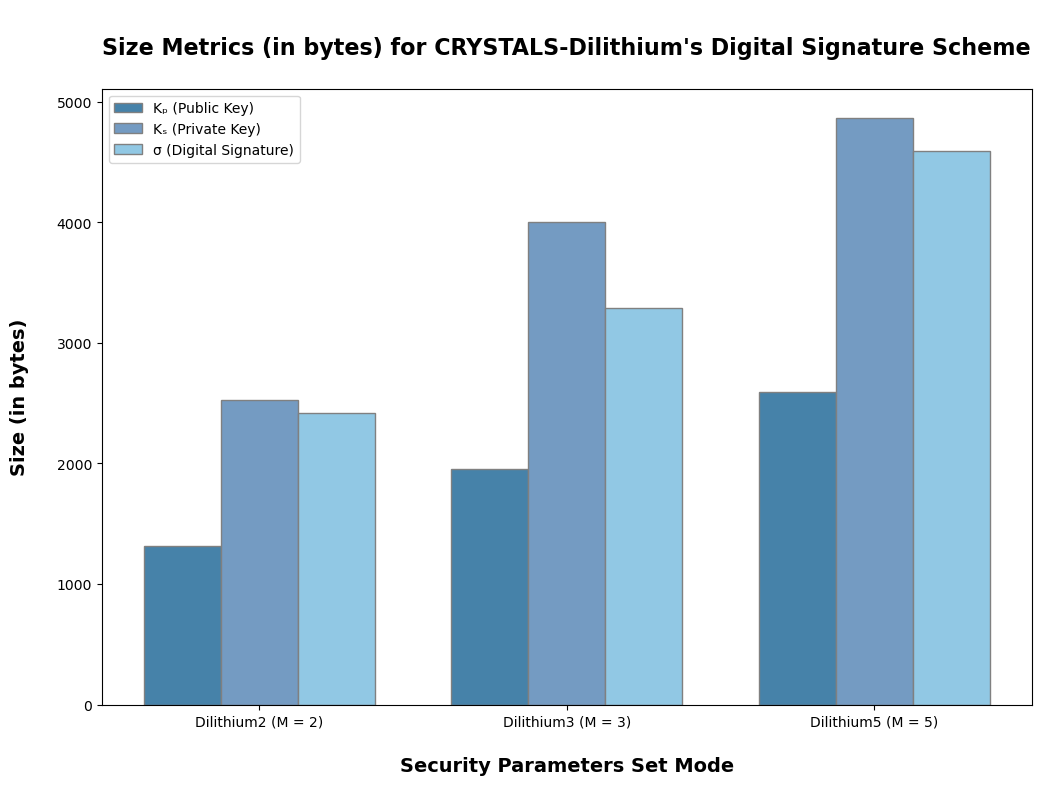

In [5]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_pub_keys_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bytes"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_priv_key_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bytes"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_dig_sign_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bytes"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.bar( bar_1, num_pub_keys_bytes,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bytes,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bytes,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.title( "\nSize Metrics (in bytes) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bytes)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium3 (M = 3)", "Dilithium5 (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.show()

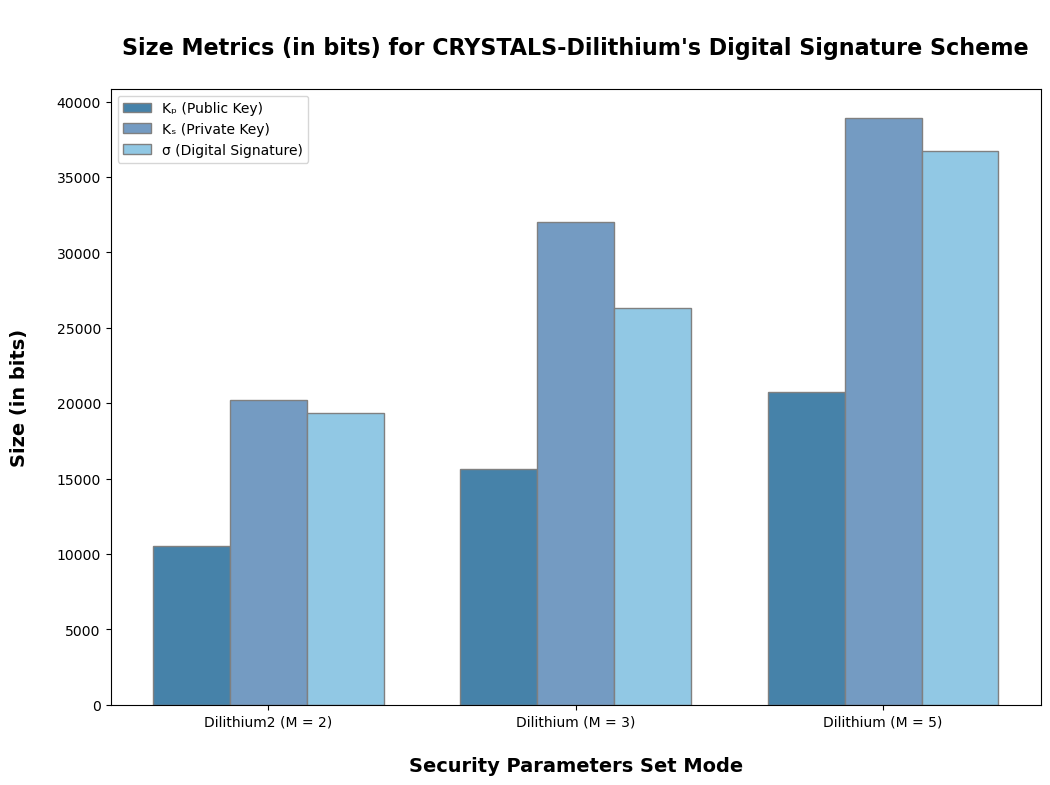

In [6]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_pub_keys_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bits"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_priv_key_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bits"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_dig_sign_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bits"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.bar( bar_1, num_pub_keys_bits,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bits,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bits,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.title( "\nSize Metrics (in bits) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bits)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium (M = 3)", "Dilithium (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.show()

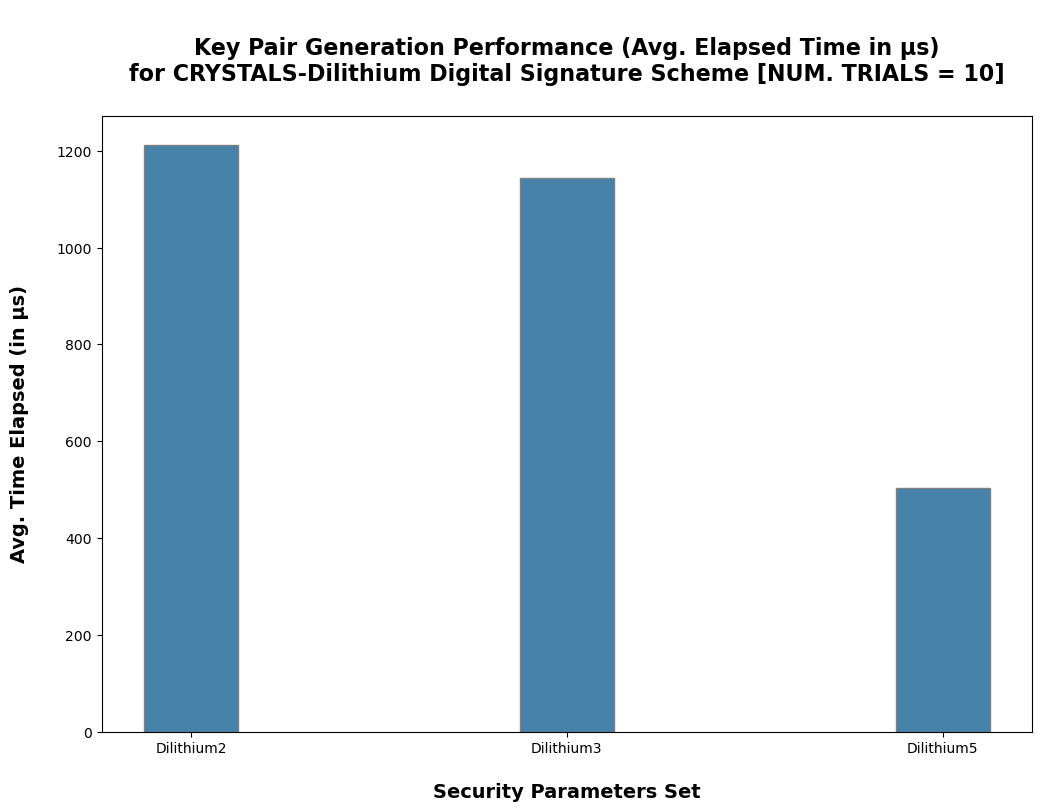

In [7]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Definition of the number of trials
# used to estimate the average times for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
NUM_TRIALS = 10


# Creation of a Python's nested dictionary for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy the values, in microseconds (μs), from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_key_pair_generation_performance_metrics = \
    {  "Dilithium2": 1211.917,
       "Dilithium3": 1142.841,
       "Dilithium5": 502.913 }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )
 
# Construction of the bar plots for
# each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.bar( crystals_dilithium_key_pair_generation_performance_metrics.keys(),
             crystals_dilithium_key_pair_generation_performance_metrics.values(),
             color = "#4682A9", edgecolor = "grey",
             width = bar_width )

# Definition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
plot_title = "\nKey Pair Generation Performance (Avg. Elapsed Time in μs)\n"\
             "for CRYSTALS-Dilithium Digital Signature Scheme [NUM. TRIALS = {num_trials}]\n"\
             .format(num_trials = NUM_TRIALS)

# Addition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.title( plot_title, fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set Mode
# used by the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Avg. Time Elapsed (in μs)\n", fontweight = "bold", fontsize = 14 )

# Showing of the bar plots for each
# Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.show()

***

### Demonstration for the EUF-CMA Signing/Verifying<br>using the CRYSTALS-Dilithium Digital Signature Scheme

In [8]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.DilithiumParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium Digital Signature Scheme.
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPublicKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumSigner;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;


import org.bouncycastle.util.Arrays;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of class of Public-Key Digital Signature Scheme
// CRYSTALS-Dilithium (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsDilithiumDigitalSignatureScheme {

    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public final String[]
        security_parameters_modes_names = {
    
        // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        "Dilithium2",
        
        // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        "Dilithium3",
        
        // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        "Dilithium5"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final String[] 
        security_parameters_modes_names_and_descriptions = {
    
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        //    NOTE: The Dilithium2 has a NIST (Classical) Post-Quantum
        //          Security Level of 2 (≈ collision search on SHA-256).
        "=> Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 85 bits.\n\n   " +
        "               NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 2 (≈ collision search on SHA-256).",
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        //    NOTE: The Dilithium3 has a NIST (Classical) Post-Quantum
        //          Security Level of 3 (≈ exhaustive search on AES-192).
        "=> Dilithium3: Security Parameters Set with a factor of (k,l) = (6,5)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 96 bits.\n\n   " +
        "               NOTE: The Dilithium3 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        //    NOTE: The Dilithium5 has a NIST (Classical) Post-Quantum
        //          Security Level of 5 (≈ exhaustive search on AES-256).
        "=> Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 128 bits.\n\n   " +
        "               NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final DilithiumParameterSpec[] 
        security_parameters_modes_specifications = {
        
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        DilithiumParameterSpec.dilithium2,
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        DilithiumParameterSpec.dilithium3,
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        DilithiumParameterSpec.dilithium5
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the parameter mode choice index
    // for the generation of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private short parameter_mode_choice_index;
    
    // Definition of the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumParameters parameters;
    
    // Definition of the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the generation of the instance of the Key Pair to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    // Definition of the instance of the Signer entity to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private DilithiumSigner digital_signature_package_sigma_signer;
    
    // Definition of the instance of the Verifier entity to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private DilithiumSigner digital_signature_package_sigma_verifier;
    
    // Definition of the payload of the public key
    // shared by the other party and to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of a public key of the digital signature scheme.
    private DilithiumPublicKeyParameters public_key_shared_other_party_payload;
    
    
    // Constructor of the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param parameter_mode_choice_index: The parameter choice index for
    //                                        the generation of the pair of
    //                                        asymmetric keys to be used.
    public CrystalsDilithiumDigitalSignatureScheme( short parameter_mode_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_mode_choice_index = parameter_mode_choice_index;
        
        // Initialization of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature, as a null object.
        this.asymmetric_key_pair = null;
        
        // Initialization of the instance of the Signer entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.        this.digital_signature_package_sigma_signer = null;

        // Initialization of the instance of the Verifier entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.digital_signature_package_sigma_verifier = null;

        // Initialization of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme, as a null object.
        this.public_key_shared_other_party_payload = null;

    }
    
    
    // Methods of the class of the Public-Key
    // (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
    // (CRYptographic SuiTe for Algebraic LatticeS - Dilithium).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter mode choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_mode_choice_index() {
        
        // Return of the parameter mode choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_mode_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
        // Security Parameters Modes defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes defined for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_mode_name_and_description() {
        
        // Return of the string with the name and
        // description of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Modes defined for
        // the key pair generation (consisting on private and public keys),
        // as well as the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names_and_descriptions[ this.parameter_mode_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes Specifications.
    public DilithiumParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Specifications.
        return security_parameters_modes_specifications[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium2' Security Parameter Mode Set.
        if( this.parameter_mode_choice_index == 0 ) {
            
            // Setting the 'Dilithium2' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium2;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium3' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 1 ) {
            
            // Setting the 'Dilithium3' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium3;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium5' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 2 ) {
            
            // Setting the 'Dilithium5' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium5;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public DilithiumParameters get_parameters() {
        
        // Return of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.parameters;
        
    }
    
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.key_generation_parameters = 
                new DilithiumKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public DilithiumKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used
    // by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        DilithiumKeyPairGenerator crystals_dilithium_key_pair_generator = 
            new DilithiumKeyPairGenerator();

        // Initialization of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, using
        // the Security Parameters set defined before.
        crystals_dilithium_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        this.asymmetric_key_pair = 
            crystals_dilithium_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_public_key_parameters().getRho();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the packed polynomial
    // target solution t₁ vector/array encoded (and compressed)
    // in bytes (rounded from the initial target solution
    // vector/array for the mathematical equation A x s + e = t₁),
    // representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
        
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_public_key_parameters().getT1();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
    
        }
    
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( DilithiumPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build public key payload.

            // Retrieval of the the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();
                
            // Retrieval of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution t₁
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_public_key_parameters();
            

            // Return of the payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     pseudo_random_seed_rho,
                                                     target_solution_t_1 );
        
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of public key of the digital signature scheme,
    // using the associated encoding in an array of bytes.
    public DilithiumPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme.
    public DilithiumPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // public key of the digital signature scheme.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getRho();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_key_k_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getK();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_target_result_solution_tr_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getTr();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_2_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS2();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_0_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT0();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( DilithiumPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bits() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme.
    public DilithiumPrivateKeyParameters get_private_key_payload() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build private key payload.

            // Retrieval of the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_private_key_parameters();
            
            // Retrieval of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_key_k = 
                this.get_pseudo_random_key_k_from_private_key_parameters();
            
            // Retrieval of the final polynomial target
            // result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] target_result_solution_tr = 
                this.get_target_result_solution_tr_from_private_key_parameters();
            
            // Retrieval of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_1 = 
                this.get_random_secret_s_1_from_private_key_parameters();
    
            // Retrieval of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_2 = 
                this.get_random_secret_s_2_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_0 = 
                this.get_target_solution_t_0_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_private_key_parameters();
            
            
            // Return of the payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme.
            return new DilithiumPrivateKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                      pseudo_random_seed_rho,
                                                      pseudo_random_key_k,
                                                      target_result_solution_tr,
                                                      random_secret_s_1,
                                                      random_secret_s_2,
                                                      target_solution_t_0,
                                                      target_solution_t_1 );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to receive and set the payload of
    // the public key shared by the other party and
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // a public key of the digital signature scheme. 
    public void receive_and_set_public_key_shared_other_party_payload
        ( byte[] public_key_shared_other_party_encoding_bytes ) {
        
        // Retrieval of the cipher parameters from
        // the key generation parameters to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
            this.get_key_generation_parameters().getParameters();

        // Initialization of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme. 
        this.public_key_shared_other_party_payload = 
            new DilithiumPublicKeyParameters
                ( crystals_dilithium_digital_signature_scheme_parameters,
                  public_key_shared_other_party_encoding_bytes );
        
    }
    
    
    // Method to obtain the payload of the public key shared by
    // the other party and to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, as a proper object of
    // a public key of the digital signature scheme. 
    public DilithiumPublicKeyParameters get_public_key_shared_other_party_payload() {
        
        // Return of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme.
        return this.public_key_shared_other_party_payload;
        
    }
    
    
    // Method to initialize the instance of the Signer entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public void initialize_digital_signature_package_sigma_signer() {
       
        // Initialization of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_signer = new DilithiumSigner();
        
        // Setup of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_signer
            .init( true, this.get_private_key_payload() );
        
    }
        
    
    // Method to obtain the instance of the Signer entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public DilithiumSigner get_digital_signature_package_sigma_signer() {
       
        // Return of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        return this.digital_signature_package_sigma_signer;
        
    }
    
    
    // Method to generate and obtain the cryptographic
    // digital signature package σ, encoded in bytes,
    // given an initial plaintext message to be signed,
    // also encoded in bytes, using the instance of the Signer entity
    // from the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public byte[] generate_digital_signature_package_sigma_encoding_bytes
        ( byte[] plaintext_message_m_encoding_bytes ) {
    
        // If the instance of the Signer entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme is not defined by a null object.
        if( this.get_digital_signature_package_sigma_signer() != null ) {
        
            // Return (and generation) of the cryptographic digital signature package σ,
            // encoded in bytes, given an initial plaintext message to be signed,
            // also encoded in bytes, using the instance of the Signer entity
            // from the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper byte array of the cryptographic digital signature package σ.
            return this.get_digital_signature_package_sigma_signer()
                .generateSignature( plaintext_message_m_encoding_bytes );
            
        }
        // If the instance of the Signer entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme is defined by a null object.
        else {
        
            // Return of the cryptographic digital signature package σ,
            // encoded in bytes, given an initial plaintext message to be signed,
            // also encoded in bytes, using the instance of the Signer entity
            // from the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        } 
    
    }
    
    
    // Method to initialize the instance of the Verifier entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public void initialize_digital_signature_package_sigma_verifier() {
       
        // Initialization of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_verifier = new DilithiumSigner();
        
        // Setup of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        this.digital_signature_package_sigma_verifier
            .init( false, this.get_public_key_shared_other_party_payload() );
        
    }
        
    
    // Method to obtain the instance of the Verifier entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public DilithiumSigner get_digital_signature_package_sigma_verifier() {
       
        // Return of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        return this.digital_signature_package_sigma_verifier;
        
    }
    
    
    // Method (to check/verify) and obtain the resulting boolean flag
    // about if the cryptographic digital signature package σ, encoded in bytes,
    // given the corresponding initial plaintext message m, which was signed before,
    // and also encoded in bytes, using the instance of the Verifier entity from
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme is valid.
    public boolean verify_digital_signature_package_sigma_encoding_bytes_is_valid
        ( byte[] plaintext_message_m_encoding_bytes,
          byte[] cryptographic_digital_signature_package_sigma_encoding_bytes ) {
    
        // If the instance of the Verifier entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme is not defined by a null object.
        if( this.get_digital_signature_package_sigma_verifier() != null ) {
        
            // Return (after checking/verifying) of the resulting boolean flag
            // about if the cryptographic digital signature package σ, encoded in bytes,
            // given the corresponding initial plaintext message m, which was signed before,
            // and also encoded in bytes, using the instance of the Verifier entity from
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme is valid.
            return this.get_digital_signature_package_sigma_verifier()
                .verifySignature( plaintext_message_m_encoding_bytes,
                                  cryptographic_digital_signature_package_sigma_encoding_bytes );
            
        }
        // If the instance of the Verifier entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme is defined by a null object.
        else {
        
            // Return (without checking/verifying) of the resulting boolean flag
            // about if the cryptographic digital signature package σ, encoded in bytes,
            // given the corresponding initial plaintext message m, which was signed before,
            // and also encoded in bytes, using the instance of the Verifier entity from
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme is valid,
            // simply as a false boolean flag.
            return false;
            
        }
          
    }

}


// Setting of the number of parameter set mode choices for
// the generation of the asymmetric key pair to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
final short NUM_PARAMETERS_SET_MODE_CHOICES = 3;


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Creation of a CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // for the sender party/entity, using a set of security parameters' modes pre-defined.
    CrystalsDilithiumDigitalSignatureScheme crystals_dilithium_digital_signature_scheme_sender = 
        new CrystalsDilithiumDigitalSignatureScheme( param_set_mode_choice_idx );

    // Creation of a CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // for the receiver party/entity, using a set of security parameters' modes pre-defined.
    CrystalsDilithiumDigitalSignatureScheme crystals_dilithium_digital_signature_scheme_receiver = 
        new CrystalsDilithiumDigitalSignatureScheme( param_set_mode_choice_idx );
    
    

    // Retrieval of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters' Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    String crystals_dilithium_security_parameters_mode_name_and_description = 
        crystals_dilithium_digital_signature_scheme_sender.get_security_parameters_mode_name_and_description();
    
    
    // Retrieval of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Specifications.
    DilithiumParameterSpec crystals_dilithium_security_parameters_specification =
        crystals_dilithium_digital_signature_scheme_sender.get_security_parameters_specifications();

    
    // Print of the relevant information for the use of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of
    // a possible execution of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println(" ------------ EXAMPLE OF AN EXECUTION OF THE EUF-CMA CRYSTALS-DILITHIUM " + 
                                     "PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");
    
    
    // Print of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    System.out.println( "  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_dilithium_security_parameters_mode_name_and_description );
    

    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme for the sender party/entity.
    crystals_dilithium_digital_signature_scheme_sender.initialize_parameters();


    // Initialization of the general parameters
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme for the receiver party/entity.
    crystals_dilithium_digital_signature_scheme_receiver.initialize_parameters();
    
    
    // Initialization of the key generation parameters
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme for the sender party/entity.
    crystals_dilithium_digital_signature_scheme_sender.initialize_key_generation_parameters();
    
    // Initialization of the key generation parameters
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme for the receiver party/entity.
    crystals_dilithium_digital_signature_scheme_receiver.initialize_key_generation_parameters();
    

    // Initialization of the generation of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme for the sender party/entity.
    crystals_dilithium_digital_signature_scheme_sender.initialize_asymmetric_key_pair_generation();
    
    // Initialization of the generation of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme for the receiver party/entity.
    crystals_dilithium_digital_signature_scheme_receiver.initialize_asymmetric_key_pair_generation();
    
    
    // Retrieve the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme for the sender party/entity.
    byte[] public_key_encoded_bytes_sender = 
        crystals_dilithium_digital_signature_scheme_sender.get_public_key_encoded_bytes();
    
    
    //
    if( public_key_encoded_bytes_sender == null ) {
    
        //
        System.err.println("The sender party should already " +
                           "possess its asymmetric public key...");
        
        //
        System.exit(1);
    
    }
    
    
    // Retrieve the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme for the receiver party/entity.
    byte[] public_key_encoded_bytes_receiver = 
        crystals_dilithium_digital_signature_scheme_receiver.get_public_key_encoded_bytes();
    
    
    //
    if( public_key_encoded_bytes_receiver == null ) {
    
        //
        System.err.println("The receiver party should already " +
                           "possess its asymmetric public key...");
        
        //
        System.exit(1);
    
    }
    
    
    // The exchange of a copy of both public keys occurs
    // through a classical communication channel...
  
    System.out.println("The asymmetric public keys are being mutually exchanged...");
    System.out.println("\n");
  
  
    //
    crystals_dilithium_digital_signature_scheme_sender
        .receive_and_set_public_key_shared_other_party_payload(public_key_encoded_bytes_receiver);
    
    
    // 
    if( !Arrays.areEqual( crystals_dilithium_digital_signature_scheme_sender
                          .get_public_key_shared_other_party_payload().getEncoded(),
                          public_key_encoded_bytes_receiver ) ) {
    
        // 
        System.err.println("The sender party must possess the public key " +
                           "from the receiver party...");
        
        //
        System.exit(1);
    
    }
      
    
    //
    crystals_dilithium_digital_signature_scheme_receiver
        .receive_and_set_public_key_shared_other_party_payload(public_key_encoded_bytes_sender);
    
    
    // 
    if( !Arrays.areEqual( crystals_dilithium_digital_signature_scheme_receiver
                          .get_public_key_shared_other_party_payload().getEncoded(),
                          public_key_encoded_bytes_sender ) ) {
    
        // 
        System.err.println("The receiver party must possess the public key " +
                           "from the sender party...");
        
        //
        System.exit(1);
    
    }
    

    // Initialization of the generation of the instance of
    // the Signer entity to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, for the sender party/entity.
    crystals_dilithium_digital_signature_scheme_sender.initialize_digital_signature_package_sigma_signer();

    // Initialization of the generation of the instance of
    // the Verifier entity to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, for the receiver party/entity.
    crystals_dilithium_digital_signature_scheme_receiver.initialize_digital_signature_package_sigma_verifier();
    
    
    String plaintext_message_m_encoding_string = 
        "The course 'Advanced Topics in Information Security II' is awesome!!!";
    
    // The cryptographic digital signature package σ is being generated,
    // by signing the initial plaintext message m given...
  
    System.out.println("The cryptographic digital signature package σ is being generated...");
    System.out.println("\n");
    
    
    byte[] plaintext_message_m_encoding_bytes = 
        plaintext_message_m_encoding_string.getBytes();
    
    byte[] cryptographic_digital_signature_package_sigma_encoding_bytes =
        crystals_dilithium_digital_signature_scheme_sender
            .generate_digital_signature_package_sigma_encoding_bytes
                ( plaintext_message_m_encoding_bytes );
    
    
    // The exchange of a copy of both public keys occurs
    // through a classical communication channel...
  
    System.out.println("The Sender/Signer Entity is sending the cryptographic digital signature package σ,\n" + 
                       "together with the initial plaintext message m, to the Receiver/Verifier Entity...");
    System.out.println("\n");
    
    
    boolean is_digital_signature_package_sigma_encoding_bytes_valid =
        crystals_dilithium_digital_signature_scheme_receiver
            .verify_digital_signature_package_sigma_encoding_bytes_is_valid
                ( plaintext_message_m_encoding_bytes,
                  cryptographic_digital_signature_package_sigma_encoding_bytes );
    
    
    if( is_digital_signature_package_sigma_encoding_bytes_valid ) {
    
        System.out.println("The cryptographic digital signature package σ is valid " +
                           "for the given initial plaintext message m given!!!");
        System.out.println("\n");
    
    }
    
}



 ------------ EXAMPLE OF AN EXECUTION OF THE EUF-CMA CRYSTALS-DILITHIUM PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ 


  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:

   => Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)
                  for the size of the lattice algebraic structure, which provides
                  a (post-quantum) security strength of 85 bits.

                  NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)
                        Post-Quantum Security Level of 2 (≈ collision search on SHA-256).

The asymmetric public keys are being mutually exchanged...


The cryptographic digital signature package σ is being generated...


The Sender/Signer Entity is sending the cryptographic digital signature package σ,
together with the initial plaintext message m, to the Receiver/Verifier Entity...


The cryptographic digital signature package σ is valid for the given initial plaintext mes

null

***

## Conclusion
***

***In development...***

***

## References
***

***In development...***

***